# Compare vaccination strategies. $e$=0.7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']
e = 0.7

strategies = [
    ('equal', EPIDEMIC['ws_vacc'], 'Pop only'),
    ('no_vacc', EPIDEMIC['ws_vacc'], 'No vaccination'),
    ('thl', EPIDEMIC['ws_vacc'], 'Pop, Inf and Hosp'),
    ('thl', [1/2, 1/2, 0], 'Pop and Hosp'),
    ('thl', [1/2, 0, 1/2], 'Pop and Inf'),
    ('thl', [0, 1/2, 1/2], 'Hosp and Inf'),
    ('thl', [0, 1, 0], 'Hosp only'),
    ('thl', [0, 0, 1], 'Inf only'),
]

In [3]:
all_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=True,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0,
                                      e=e)

Beginning experiments.
Parameters:
Number of age ervas: 5.
Number of age groups: 9.
Number of vaccines per day: 30000.
rho: 42.30095393674314.
t0: 2021-04-18.
T: 115.
Vaccine efficacy (e): 0.7.
Rs to try: [1.0, 1.25, 1.5, 2.0].
Initialize with vaccinated people:True.
Strategies:
[('equal', [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'Pop only'), ('no_vacc', [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'No vaccination'), ('thl', [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'Pop, Inf and Hosp'), ('thl', [0.5, 0.5, 0], 'Pop and Hosp'), ('thl', [0.5, 0, 0.5], 'Pop and Inf'), ('thl', [0, 0.5, 0.5], 'Hosp and Inf'), ('thl', [0, 1, 0], 'Hosp only'), ('thl', [0, 0, 1], 'Inf only')].

Finished R: 1.0. Beta: 0.023640128813534566 1/4. Policy: Pop only. 1/8
Finished R: 1.0. Beta: 0.023640128813534566 1/4. Policy: No vaccination. 2/8
Finished R: 1.0. Beta: 0.023640128813534566 1/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.0. Beta: 0.0236401288

In [4]:
def plot_results(ax, r, metric, all_results, t0, T, skip_no_vacc=True):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]

    results_for_r = all_results[r]
    totals = []
    for label, results_all_metrics in results_for_r:
        if label == 'No vaccination' and skip_no_vacc:
            continue
        metric_results = results_all_metrics[metric]
        metric_all_time = metric_results.sum(axis=0)
        metric_all_time = metric_all_time.sum(axis=0)
        
        assert metric_all_time.shape[0] == T
        
        ax.plot(x, metric_all_time, label=label)
        if metric == 'deaths':
            total_policy = metric_all_time[-1]
        else:
            total_policy = metric_all_time.sum(axis=0)
        total = (label, total_policy)
        totals.append(total)
        
    sorted_totals = sorted(totals, key=lambda x: x[-1])
    for total in sorted_totals:
        print('%s: %s' % (total[0], total[1]))
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s.' % (metric, ))
    ax.set_title('Number of %s per policy. R=%s' % (metric, r))
    ax.legend()
        
    return ax

# Deaths

Pop and Inf: 85.36394771167761
Pop, Inf and Hosp: 85.3703961496724
Pop and Hosp: 85.39401917696267
Inf only: 85.42812496246401
Hosp and Inf: 85.43626447387186
Hosp only: 85.46370055957459
Pop only: 85.54619716829052


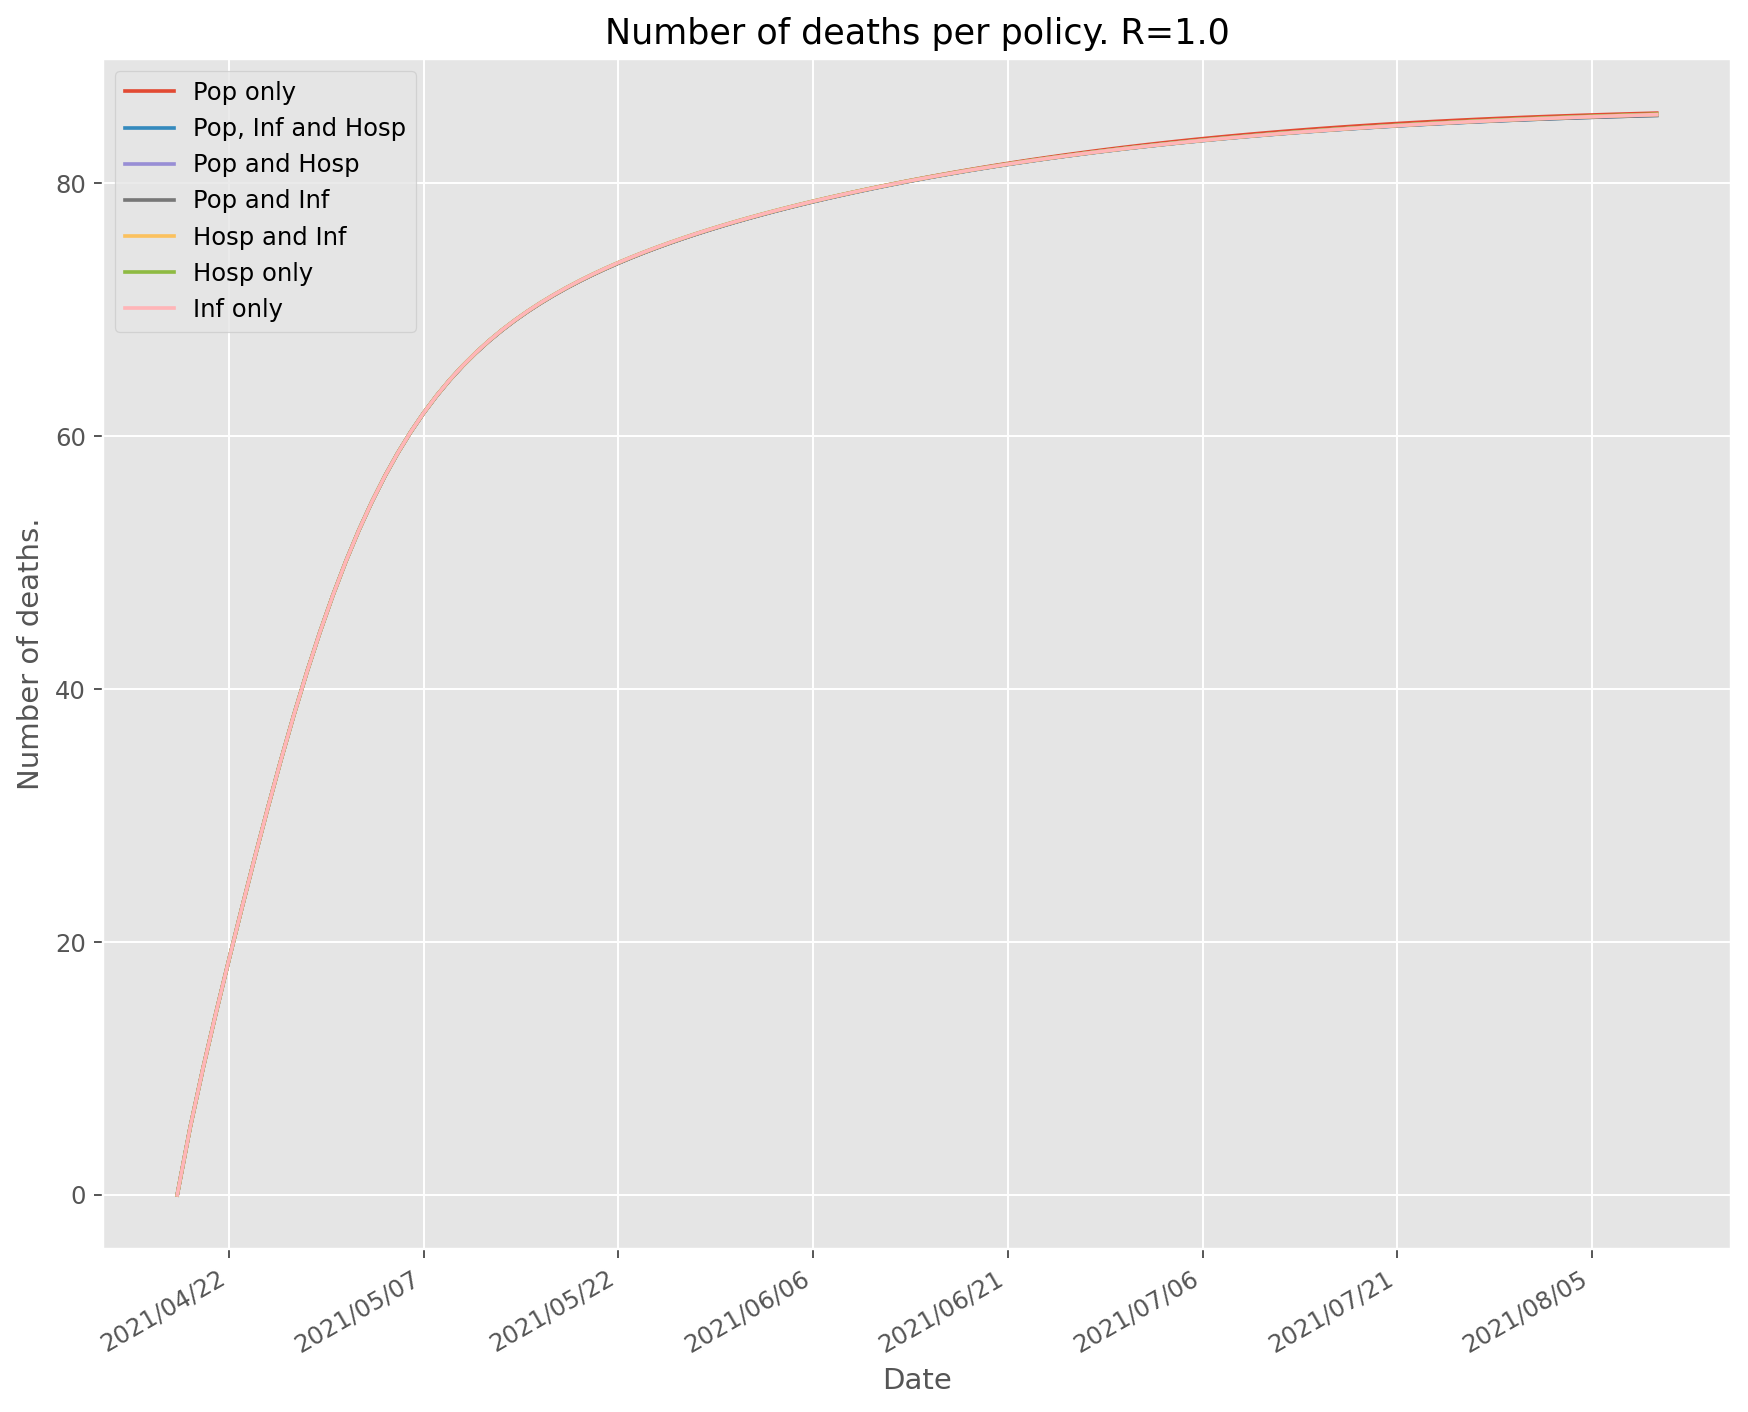

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 136.10797573861055
Pop and Hosp: 136.31275900416628
Pop, Inf and Hosp: 136.48329475228067
Pop only: 136.48431588519222
Inf only: 137.36511285405186
Hosp and Inf: 137.4711985688076
Hosp only: 137.6447128632495


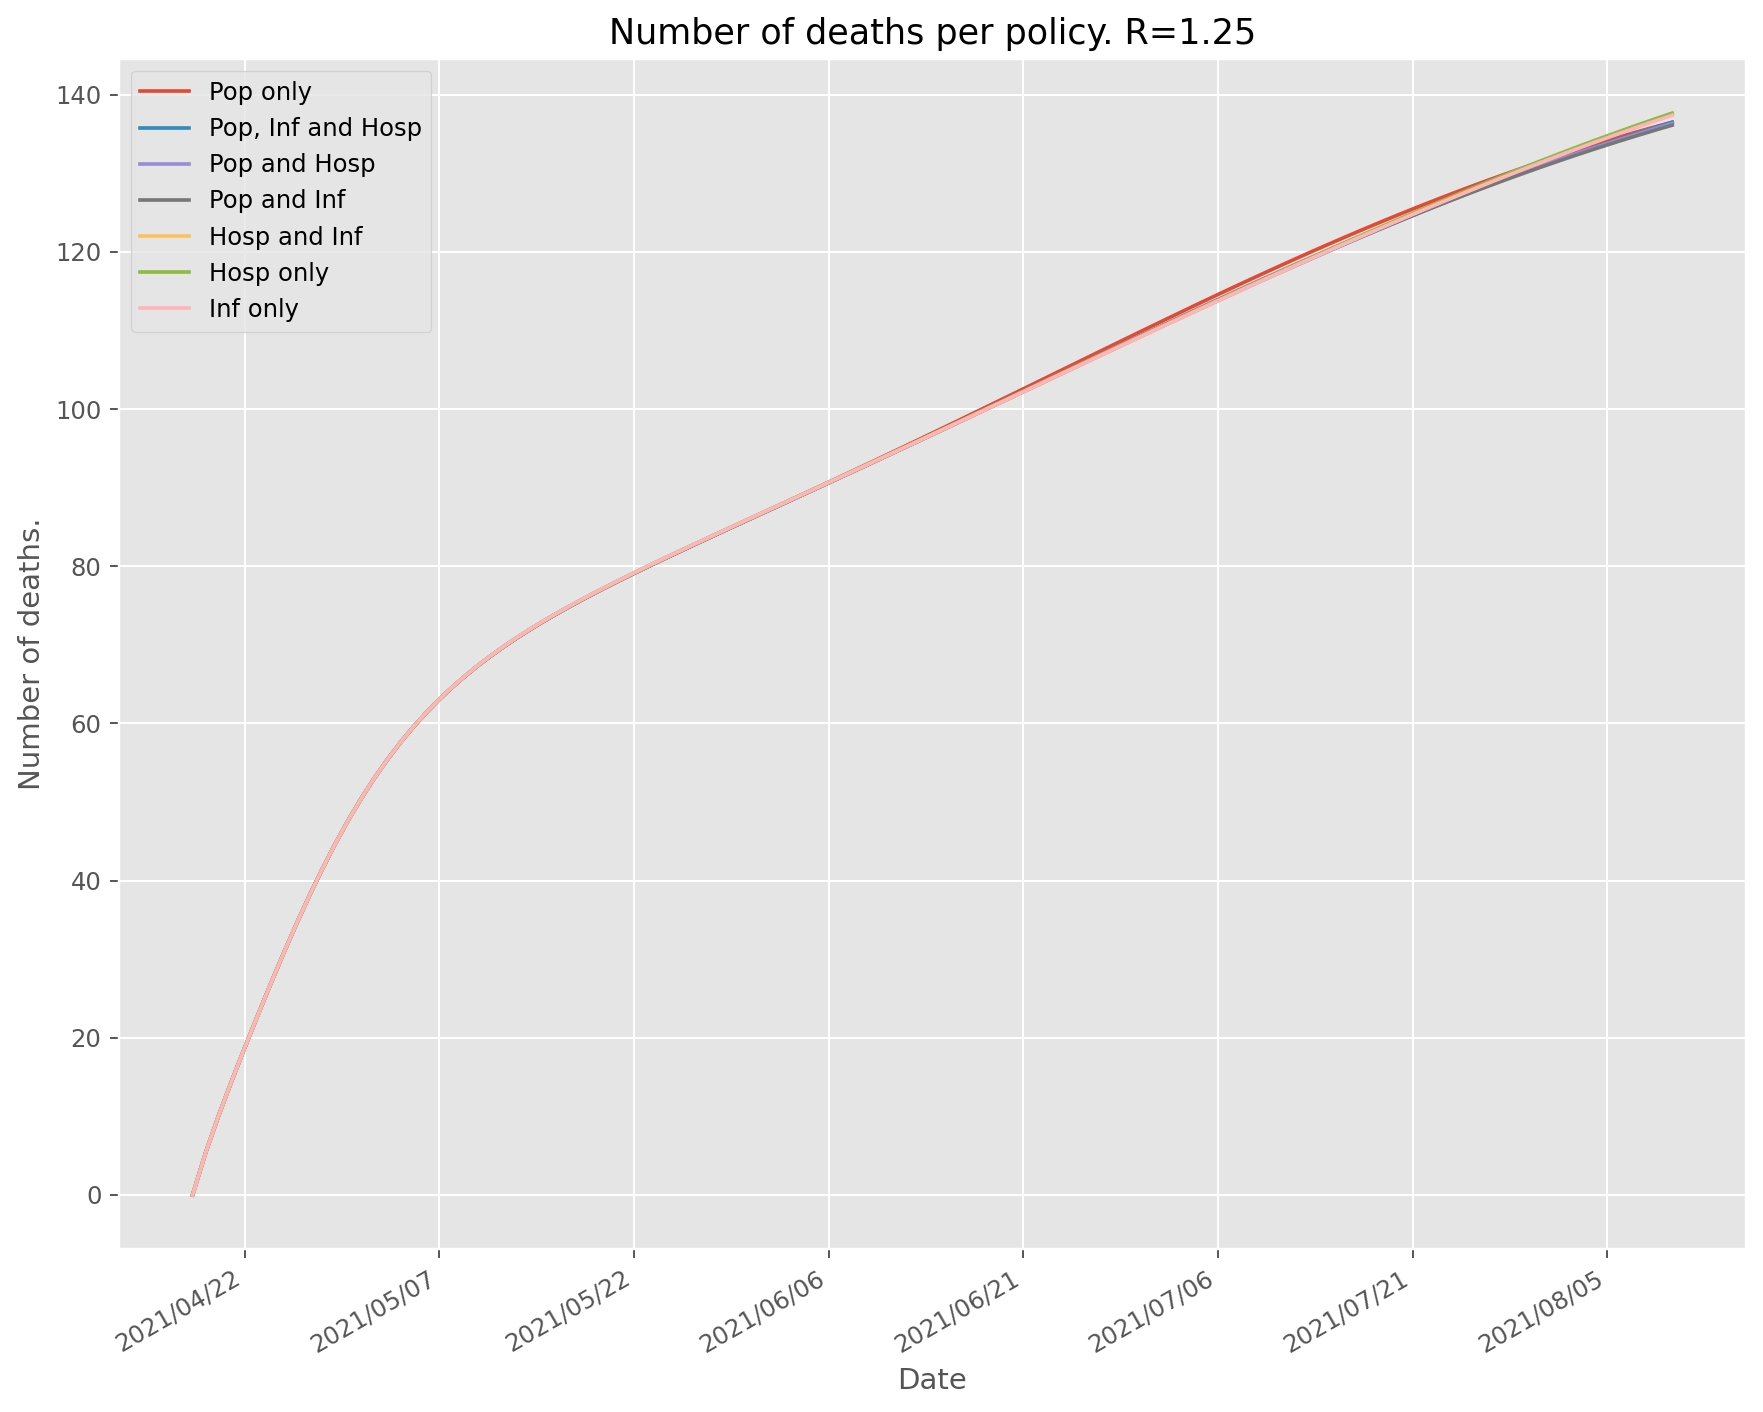

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 332.7131936862012
Pop and Inf: 338.3716009695875
Pop and Hosp: 339.3543067280094
Pop, Inf and Hosp: 342.33291804907515
Inf only: 350.36226795169625
Hosp and Inf: 350.7340053022488
Hosp only: 351.380903243671


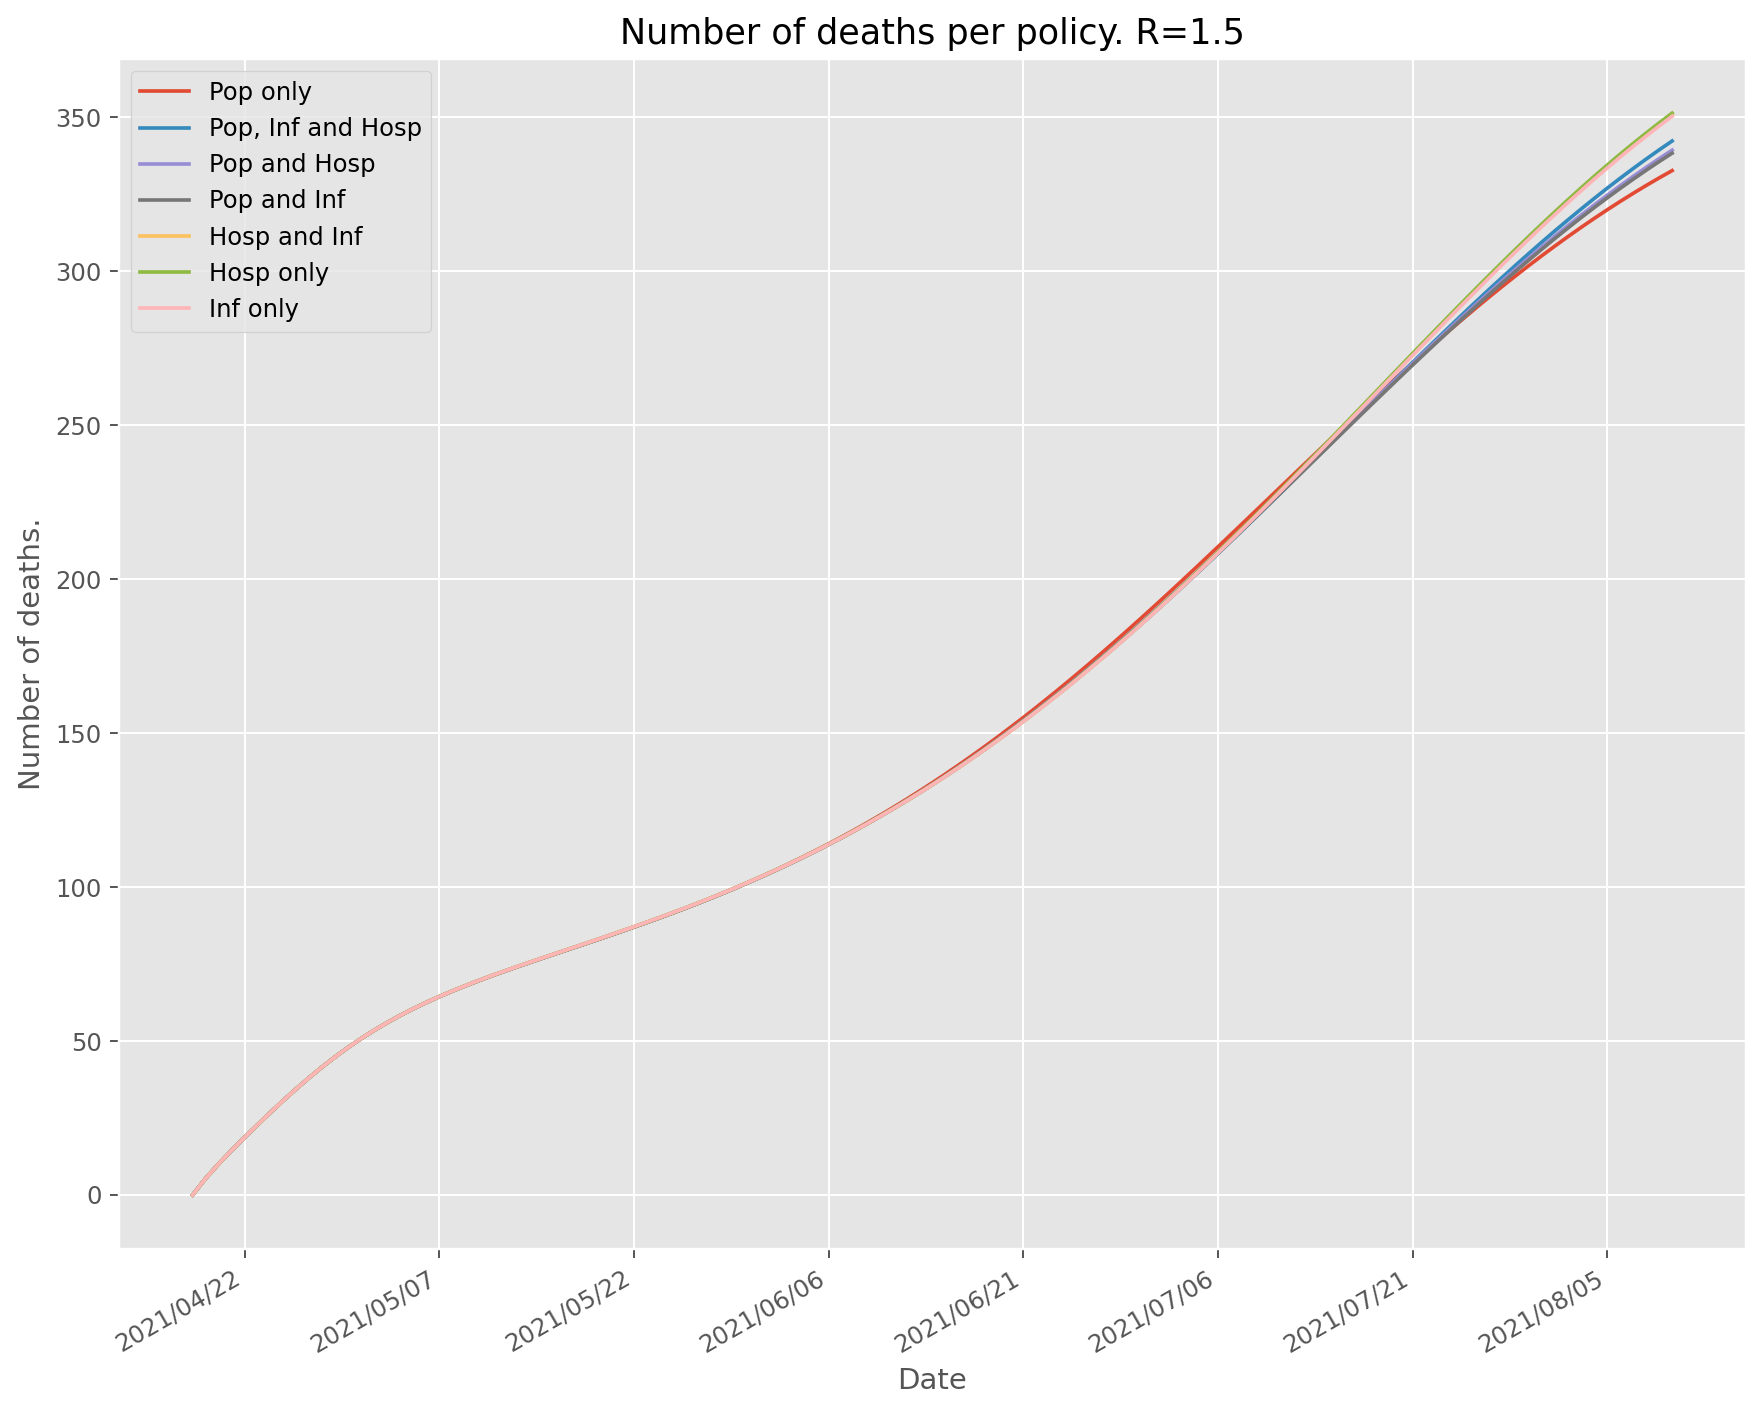

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1166.7412842550575
Pop and Inf: 1198.1399355761605
Pop and Hosp: 1200.5504404994342
Pop, Inf and Hosp: 1211.9338023597556
Hosp and Inf: 1244.4248341865887
Inf only: 1244.5436466627693
Hosp only: 1245.1334434681107


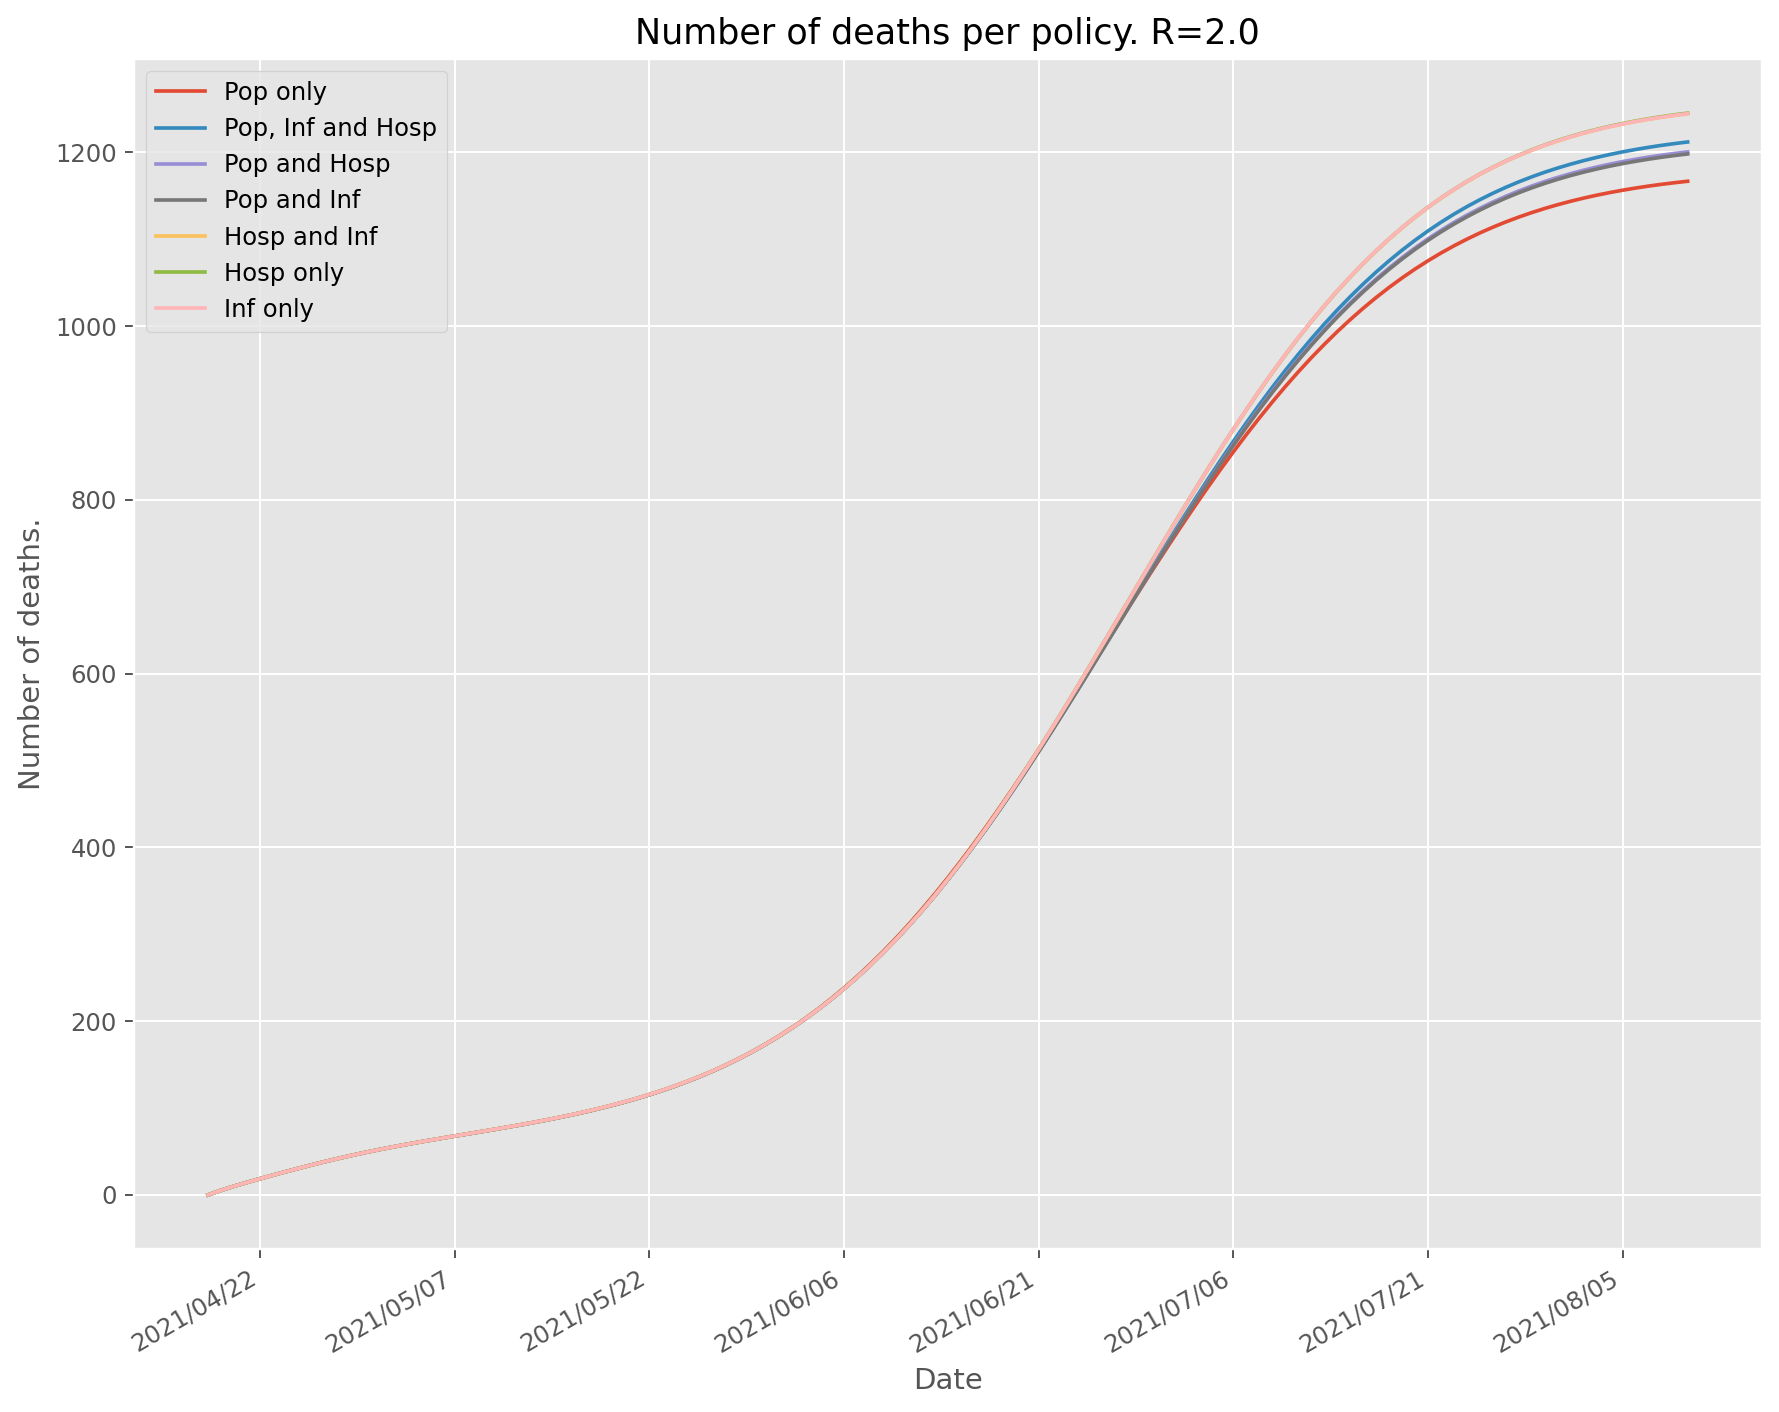

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Death incidence

Pop and Inf: 85.36394771167761
Pop, Inf and Hosp: 85.3703961496724
Pop and Hosp: 85.3940191769627
Inf only: 85.42812496246401
Hosp and Inf: 85.43626447387184
Hosp only: 85.46370055957462
Pop only: 85.5461971682905


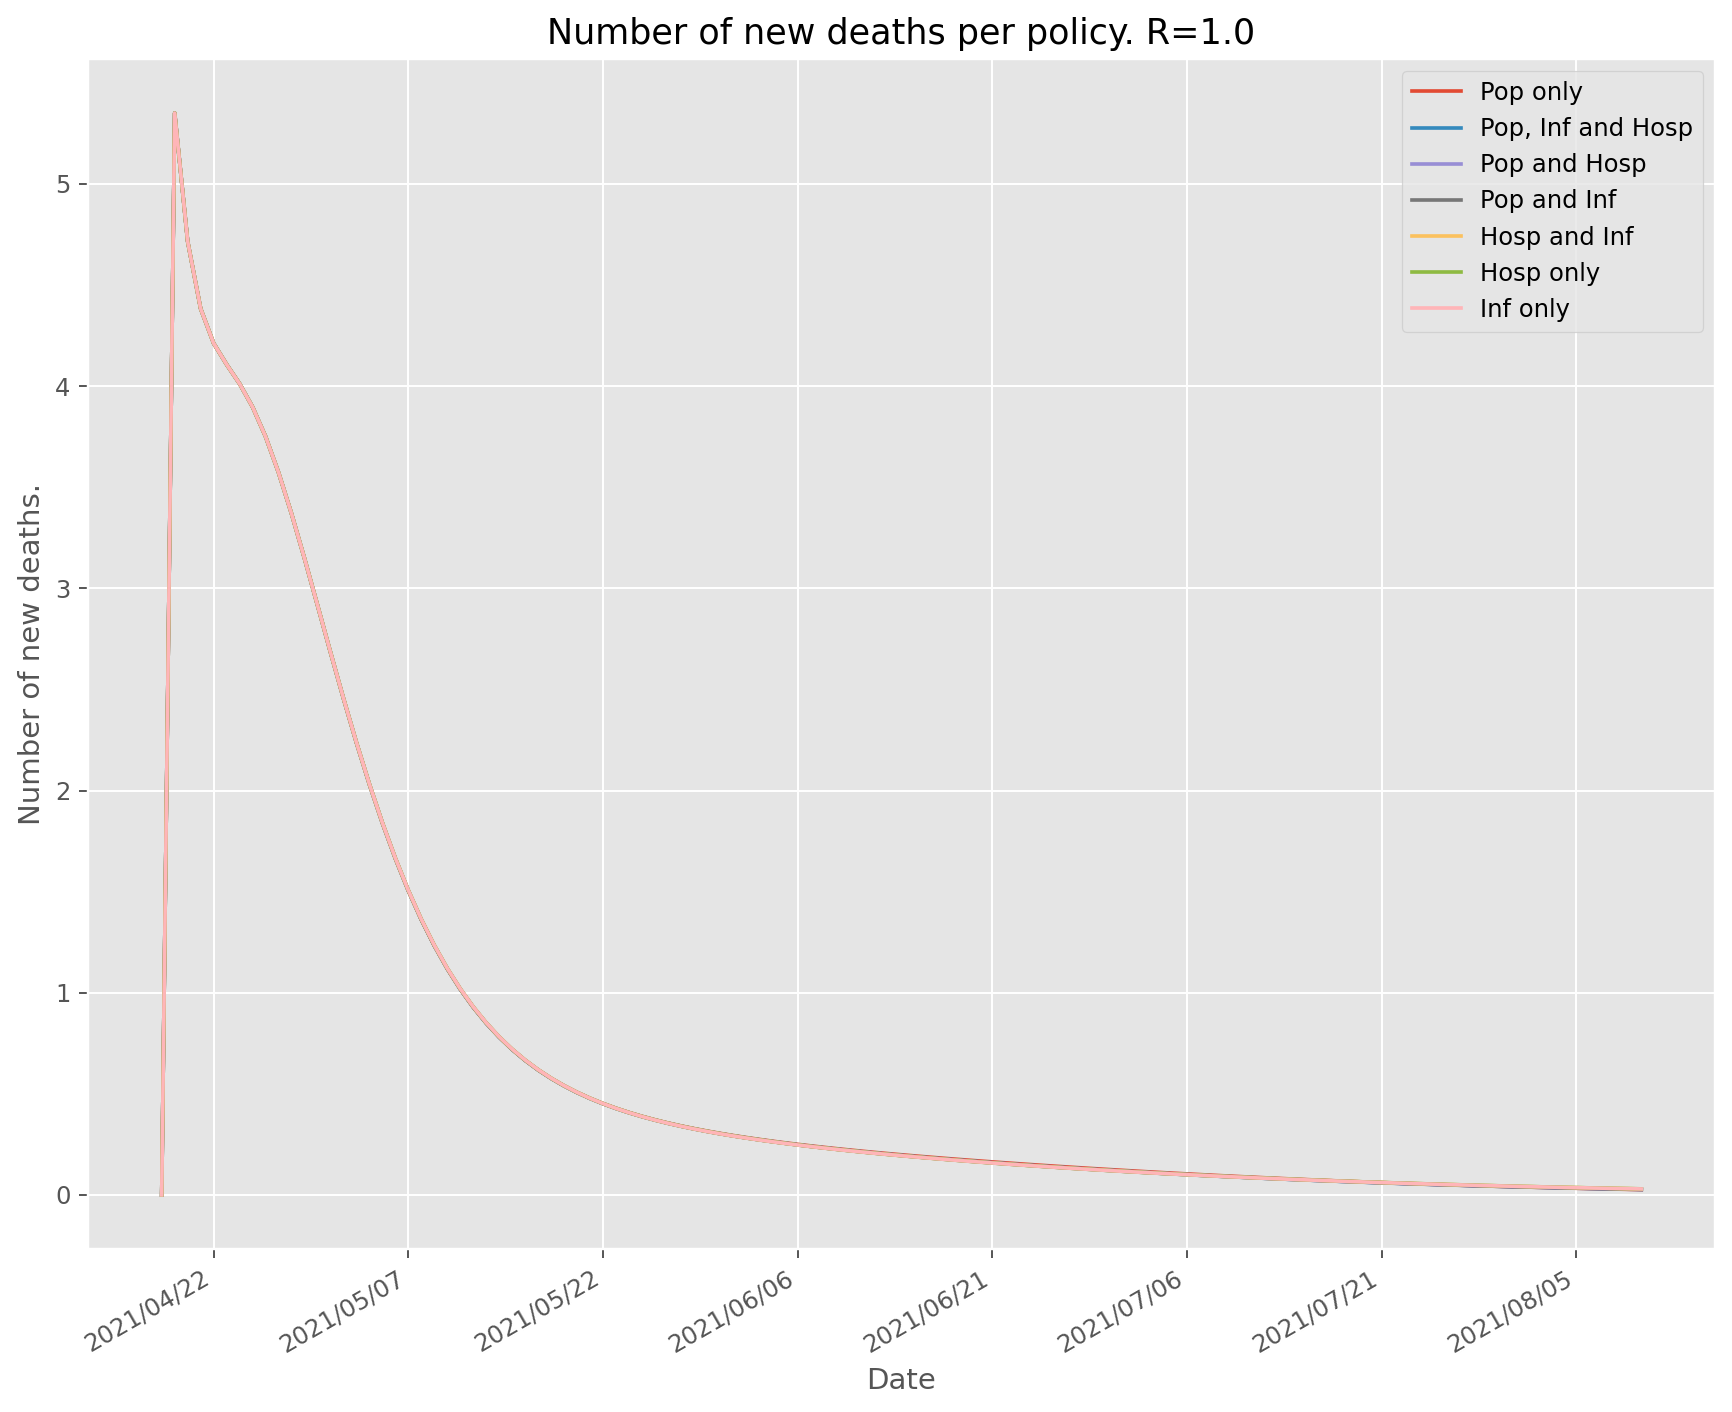

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 136.10797573861058
Pop and Hosp: 136.3127590041663
Pop, Inf and Hosp: 136.4832947522807
Pop only: 136.48431588519222
Inf only: 137.36511285405186
Hosp and Inf: 137.4711985688076
Hosp only: 137.6447128632495


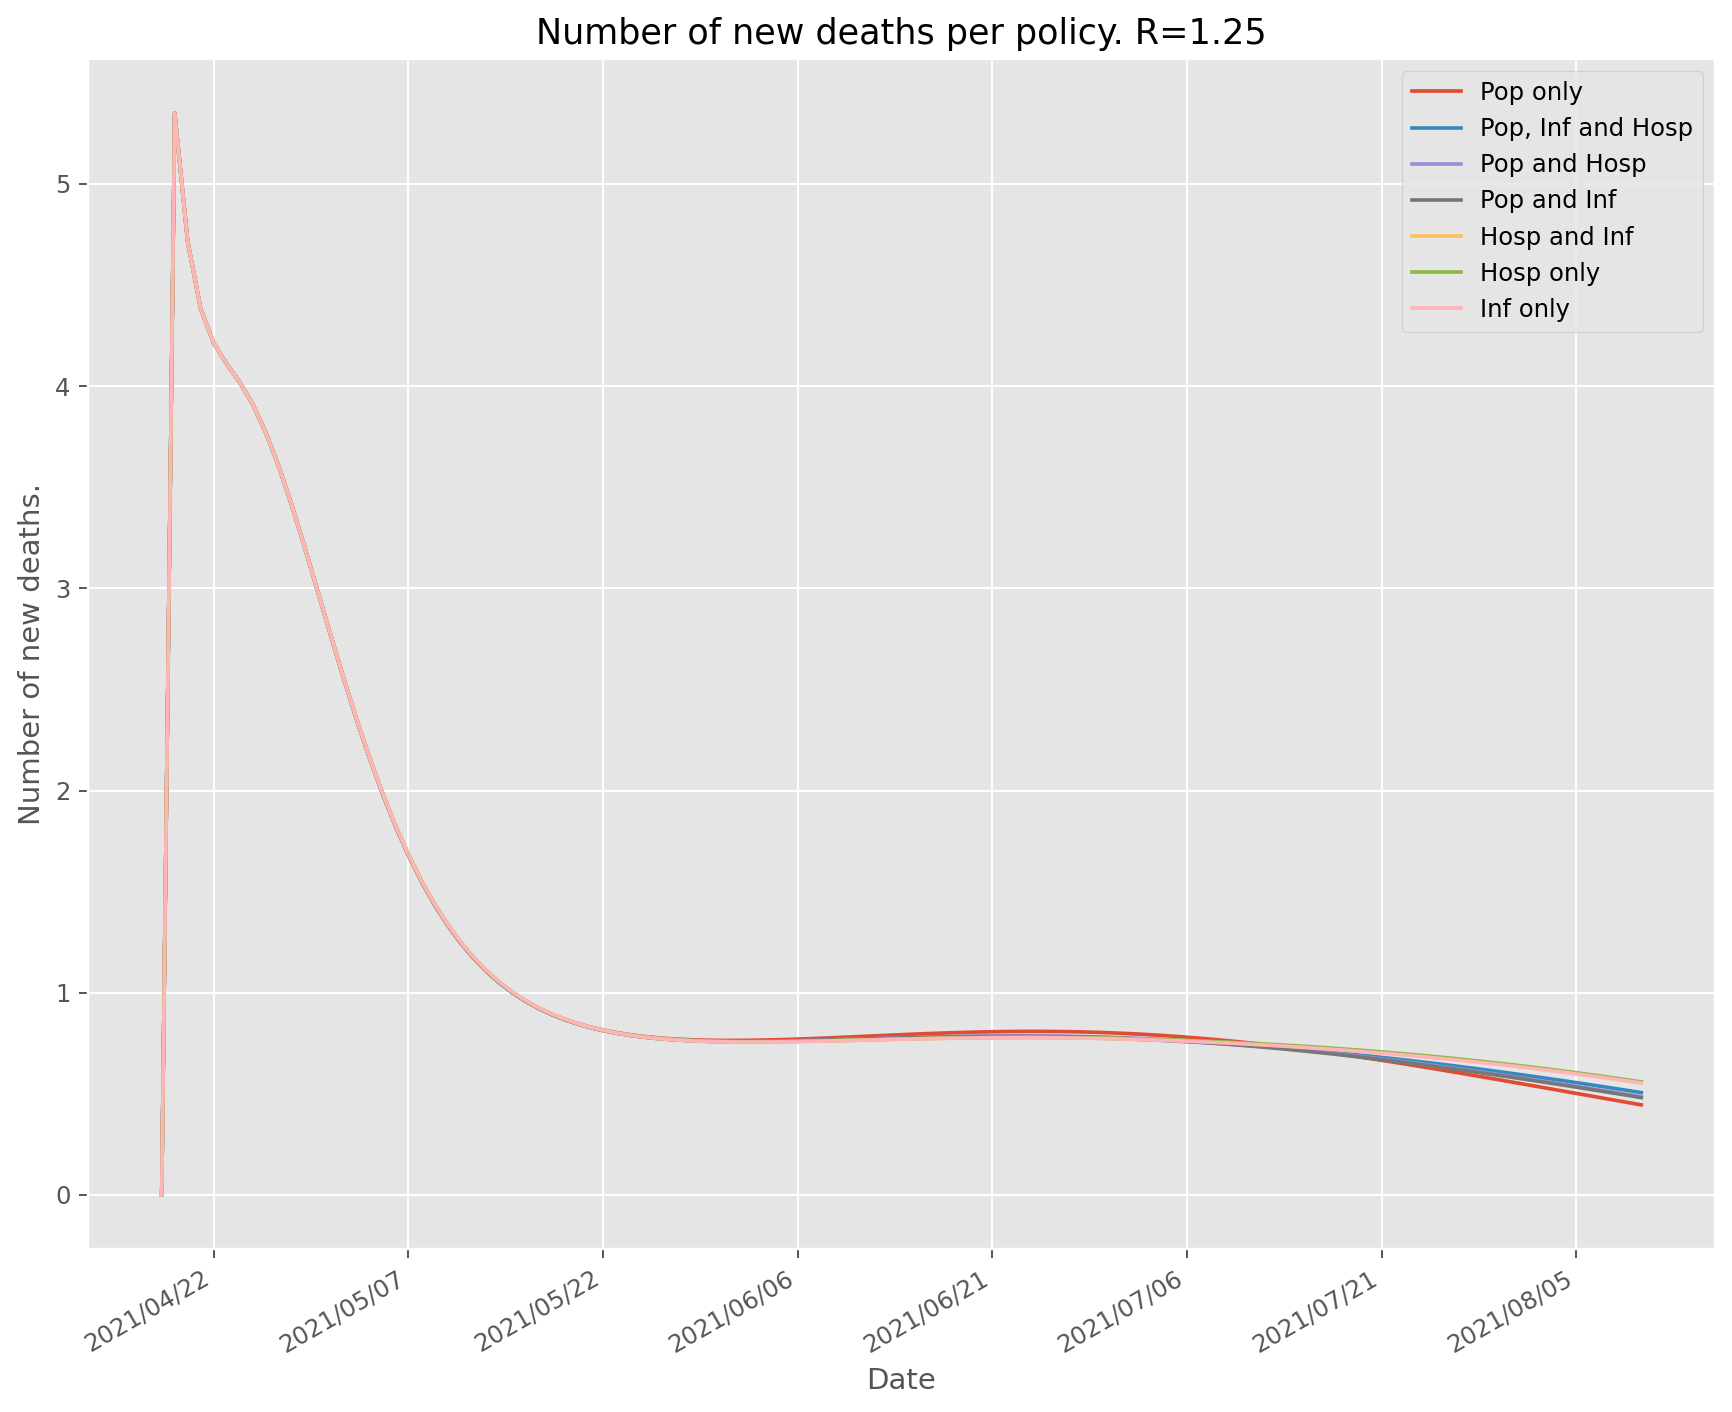

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 332.71319368620124
Pop and Inf: 338.37160096958763
Pop and Hosp: 339.3543067280095
Pop, Inf and Hosp: 342.33291804907515
Inf only: 350.3622679516963
Hosp and Inf: 350.73400530224876
Hosp only: 351.380903243671


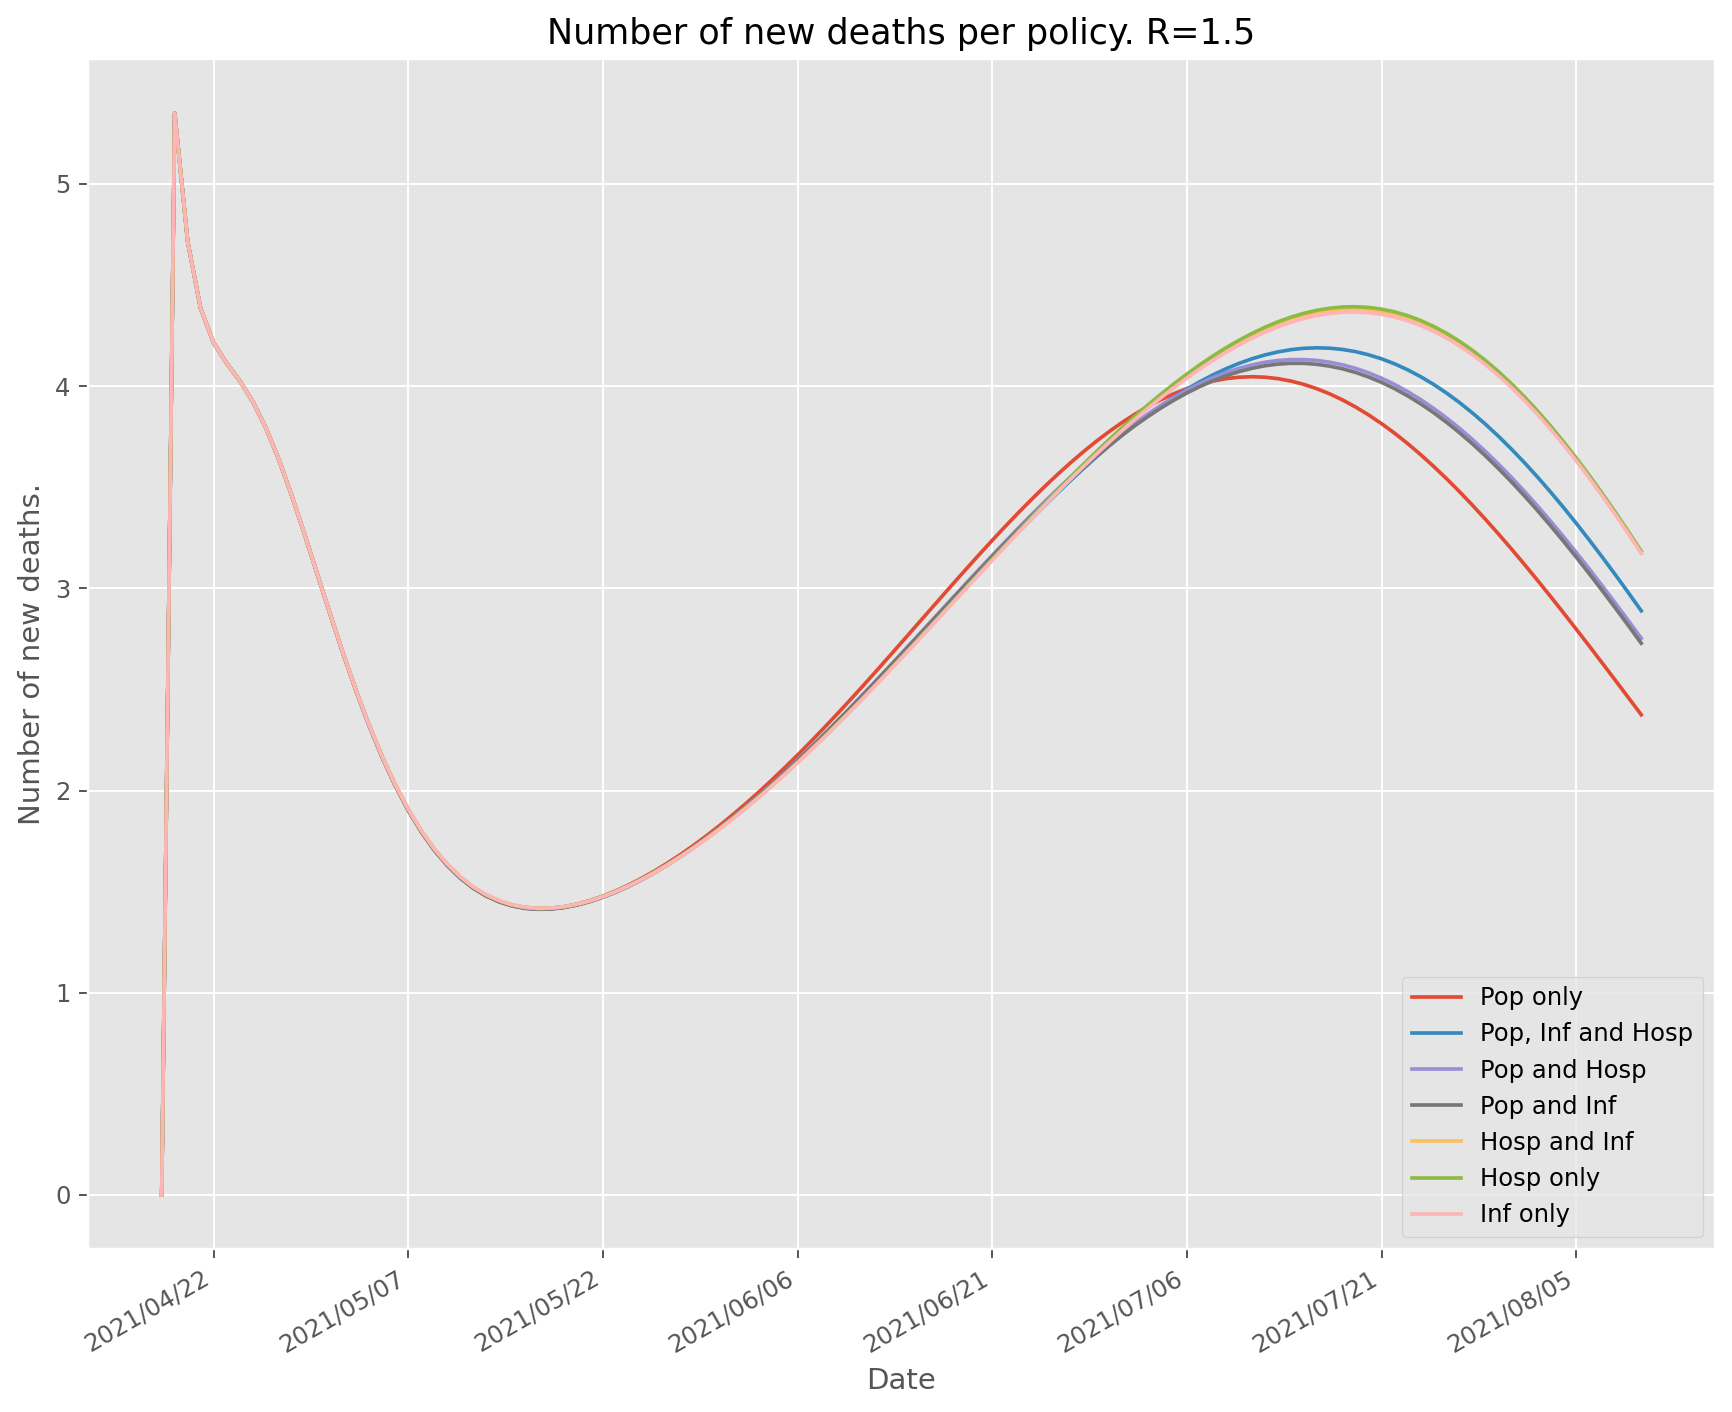

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1166.7412842550573
Pop and Inf: 1198.1399355761607
Pop and Hosp: 1200.5504404994342
Pop, Inf and Hosp: 1211.9338023597559
Hosp and Inf: 1244.4248341865882
Inf only: 1244.5436466627696
Hosp only: 1245.1334434681107


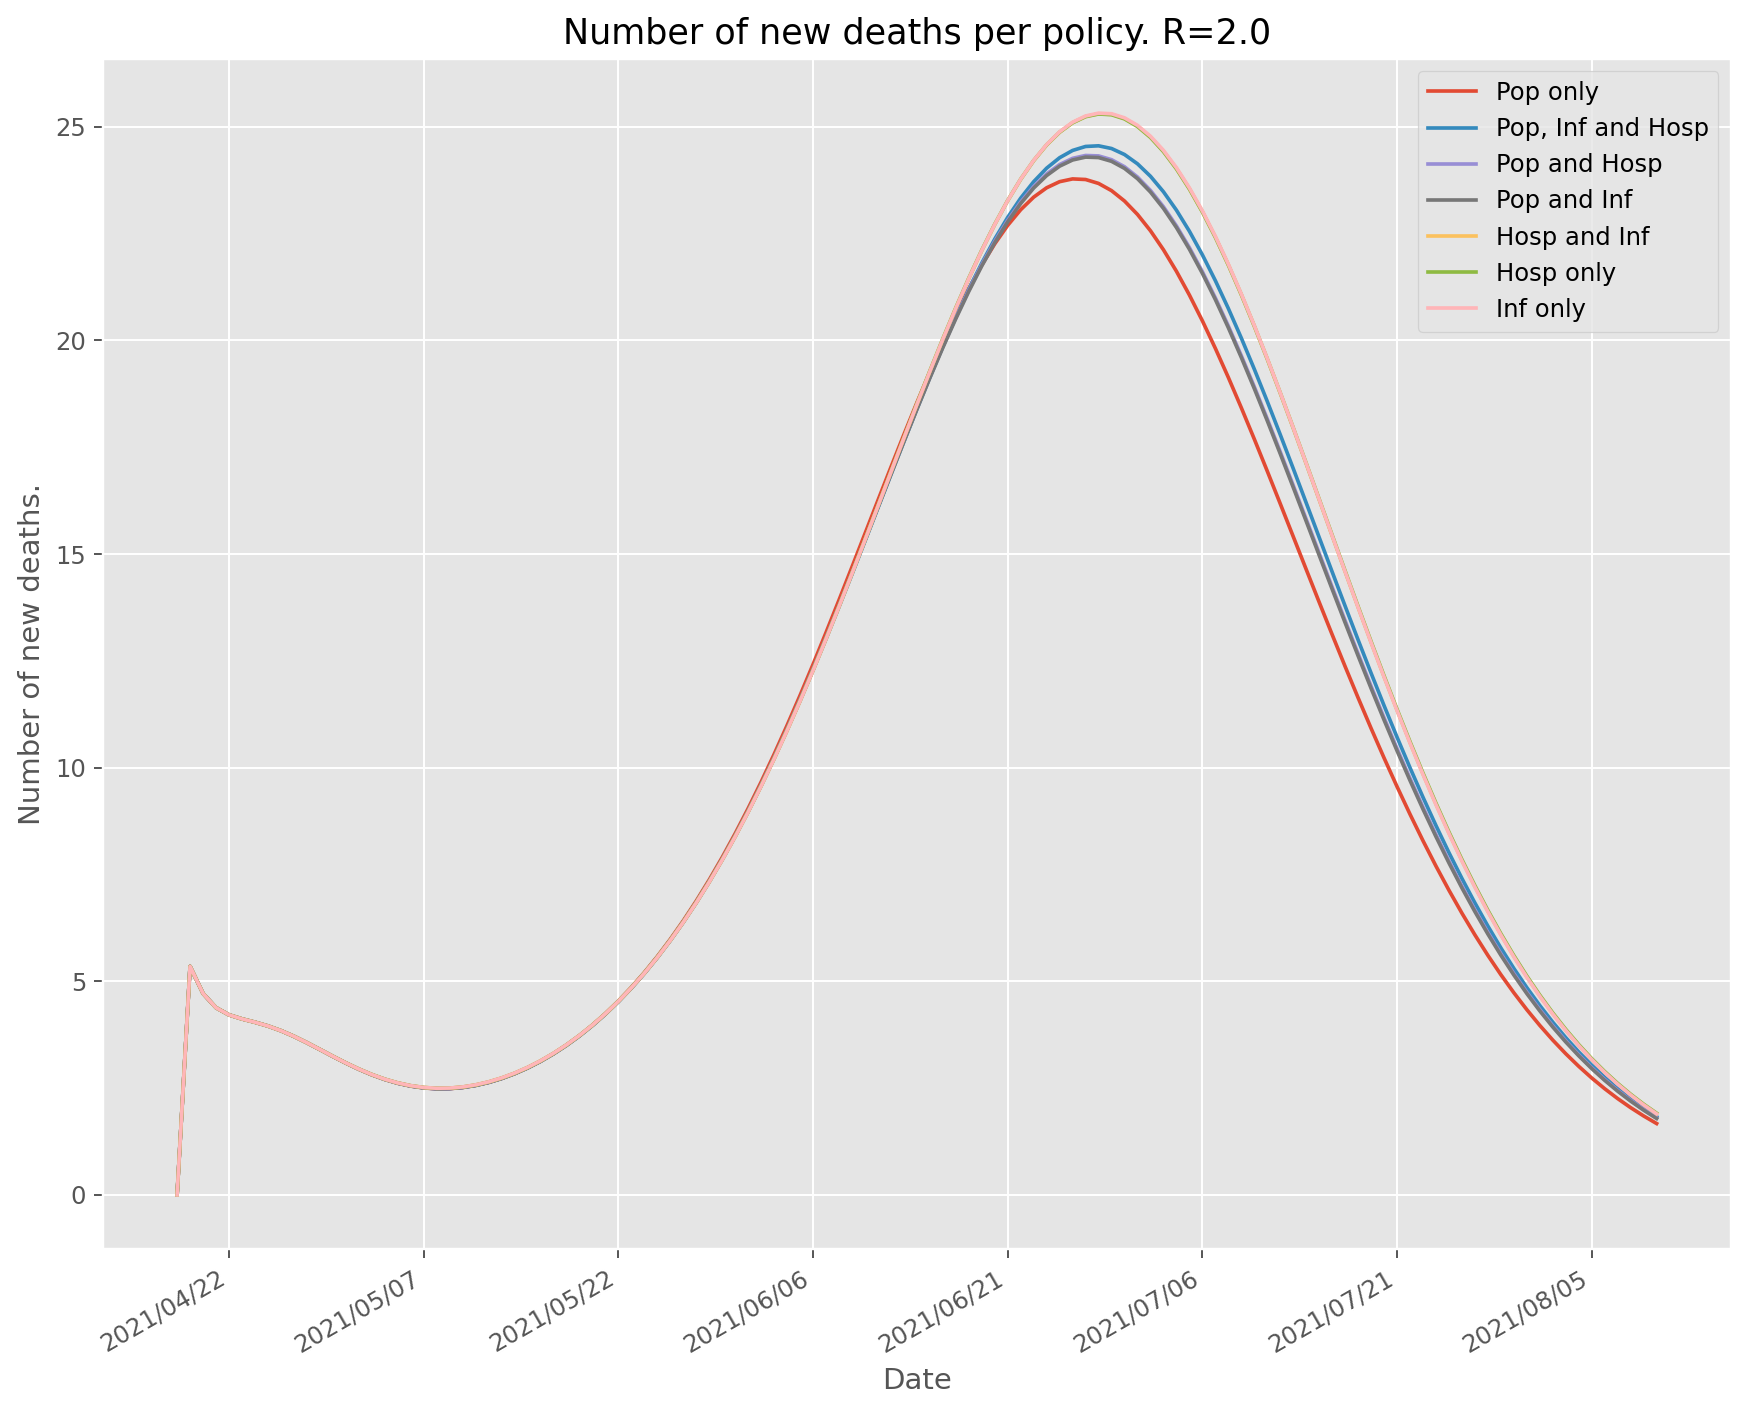

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Hospitalizations

Inf only: 8077.757238724933
Hosp and Inf: 8086.510188122651
Hosp only: 8097.178538070695
Pop, Inf and Hosp: 8116.980944467885
Pop and Inf: 8142.55167582549
Pop and Hosp: 8150.478105989092
Pop only: 8311.122961506271


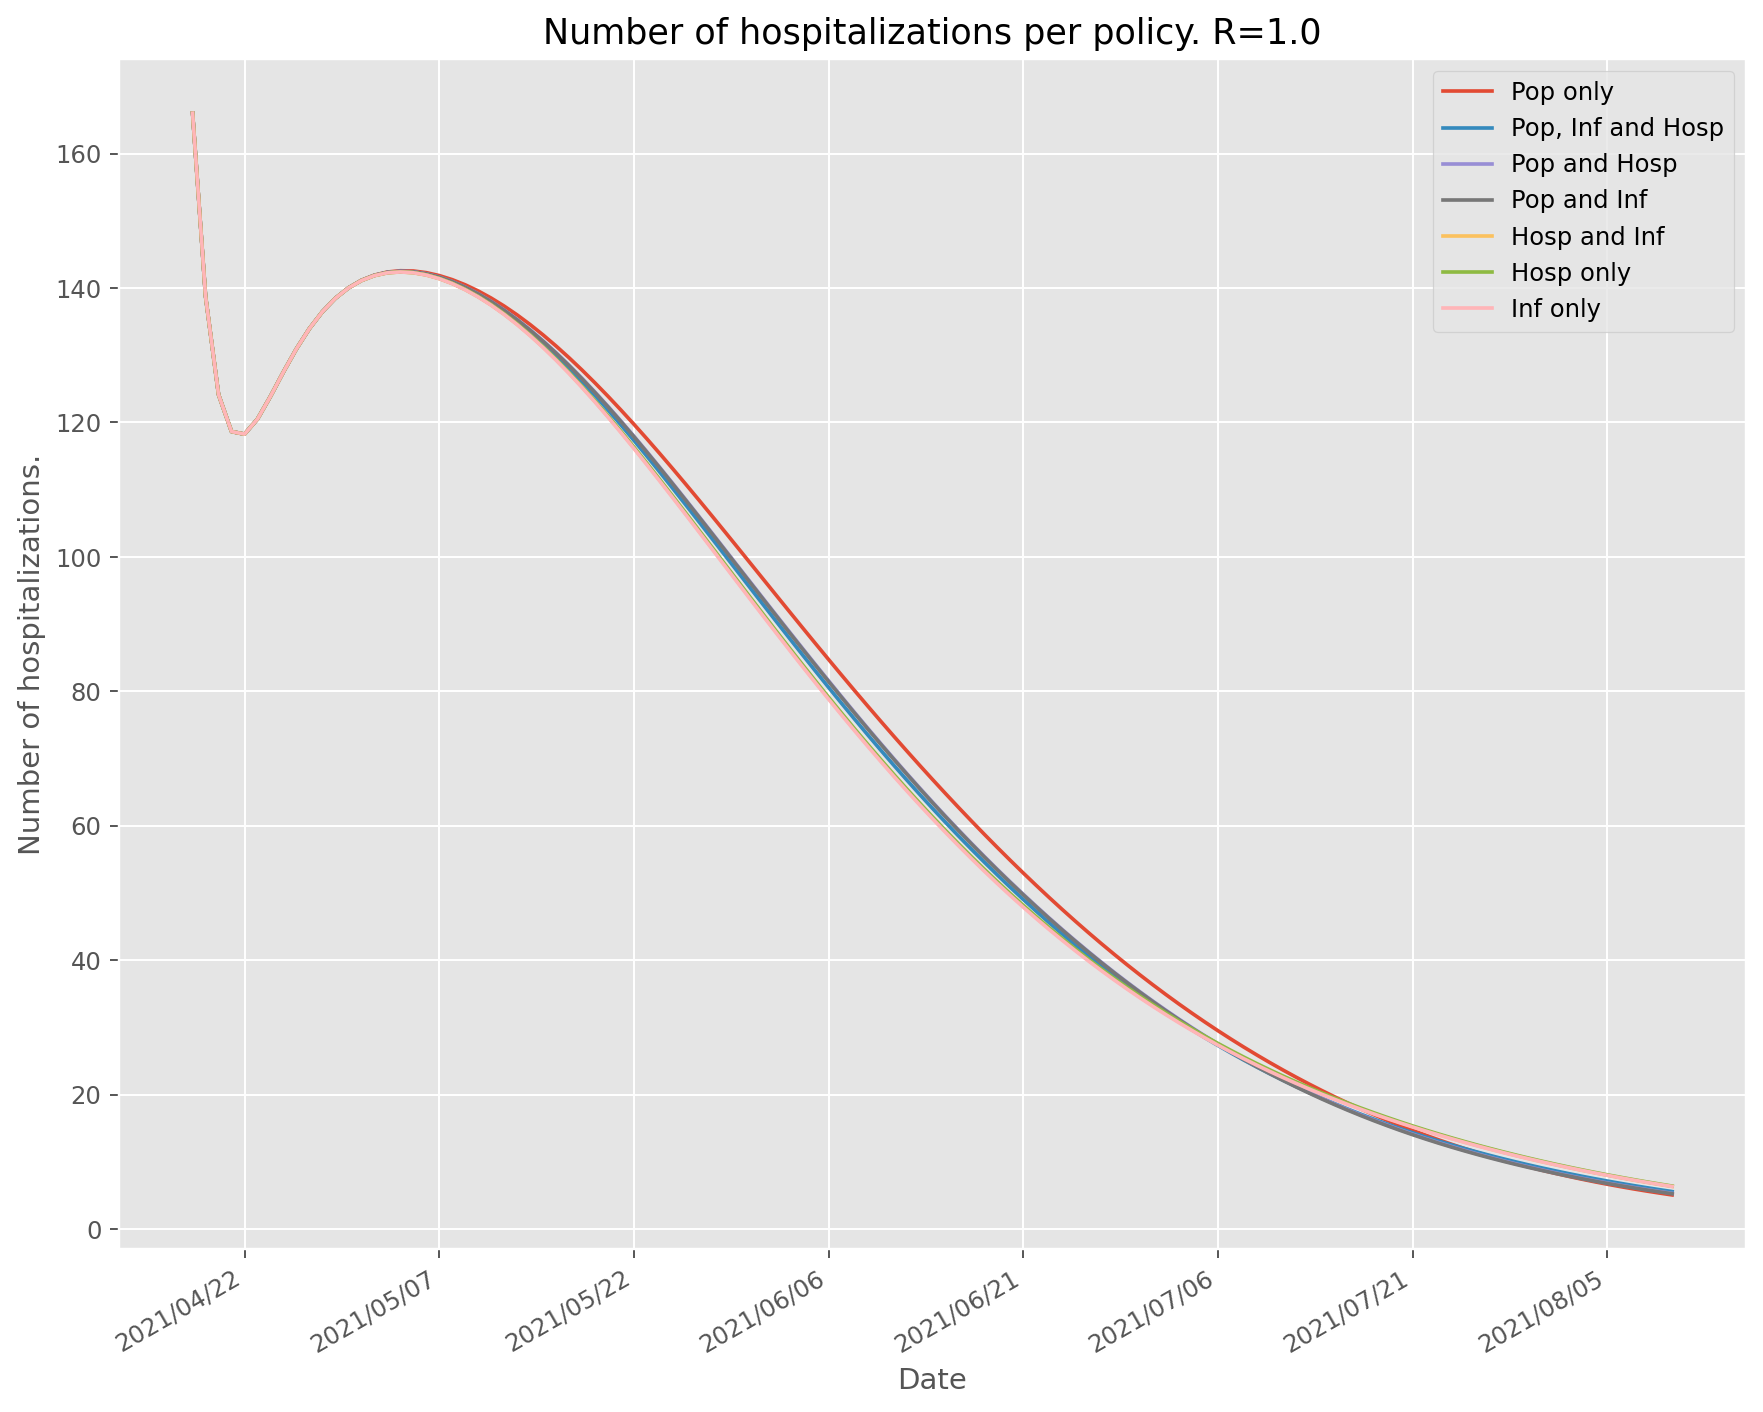

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 23478.113578657154
Pop and Hosp: 23540.223830378713
Pop, Inf and Hosp: 23554.746521046505
Inf only: 23822.785298167233
Hosp and Inf: 23867.02217618784
Hosp only: 23932.328110331742
Pop only: 24044.149835610016


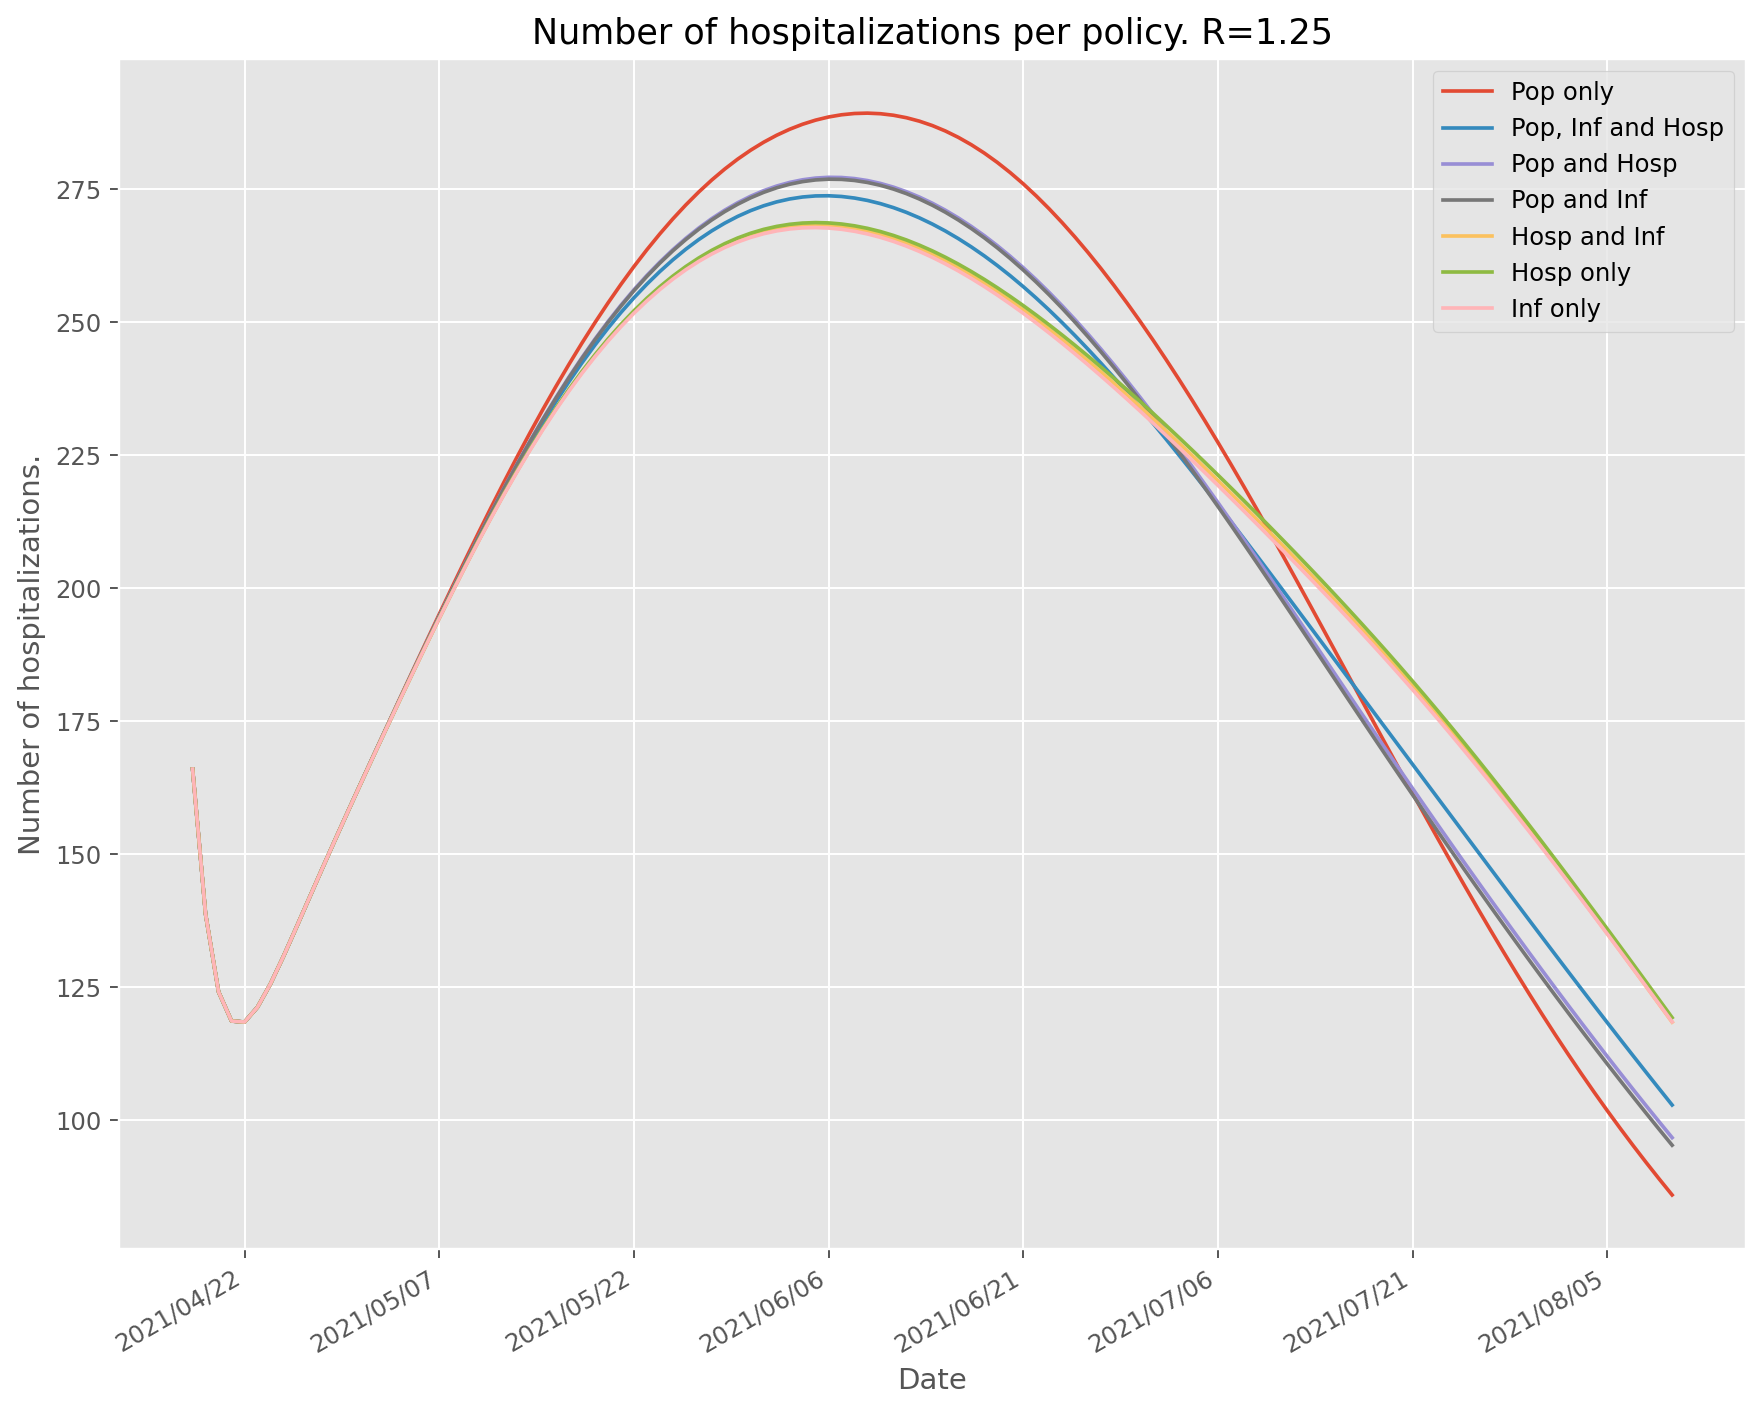

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 77778.61991370608
Pop and Inf: 78188.67521094783
Pop and Hosp: 78491.77115714388
Pop, Inf and Hosp: 79393.22329169985
Inf only: 82205.67446762192
Hosp and Inf: 82321.08023122507
Hosp only: 82557.32656870049


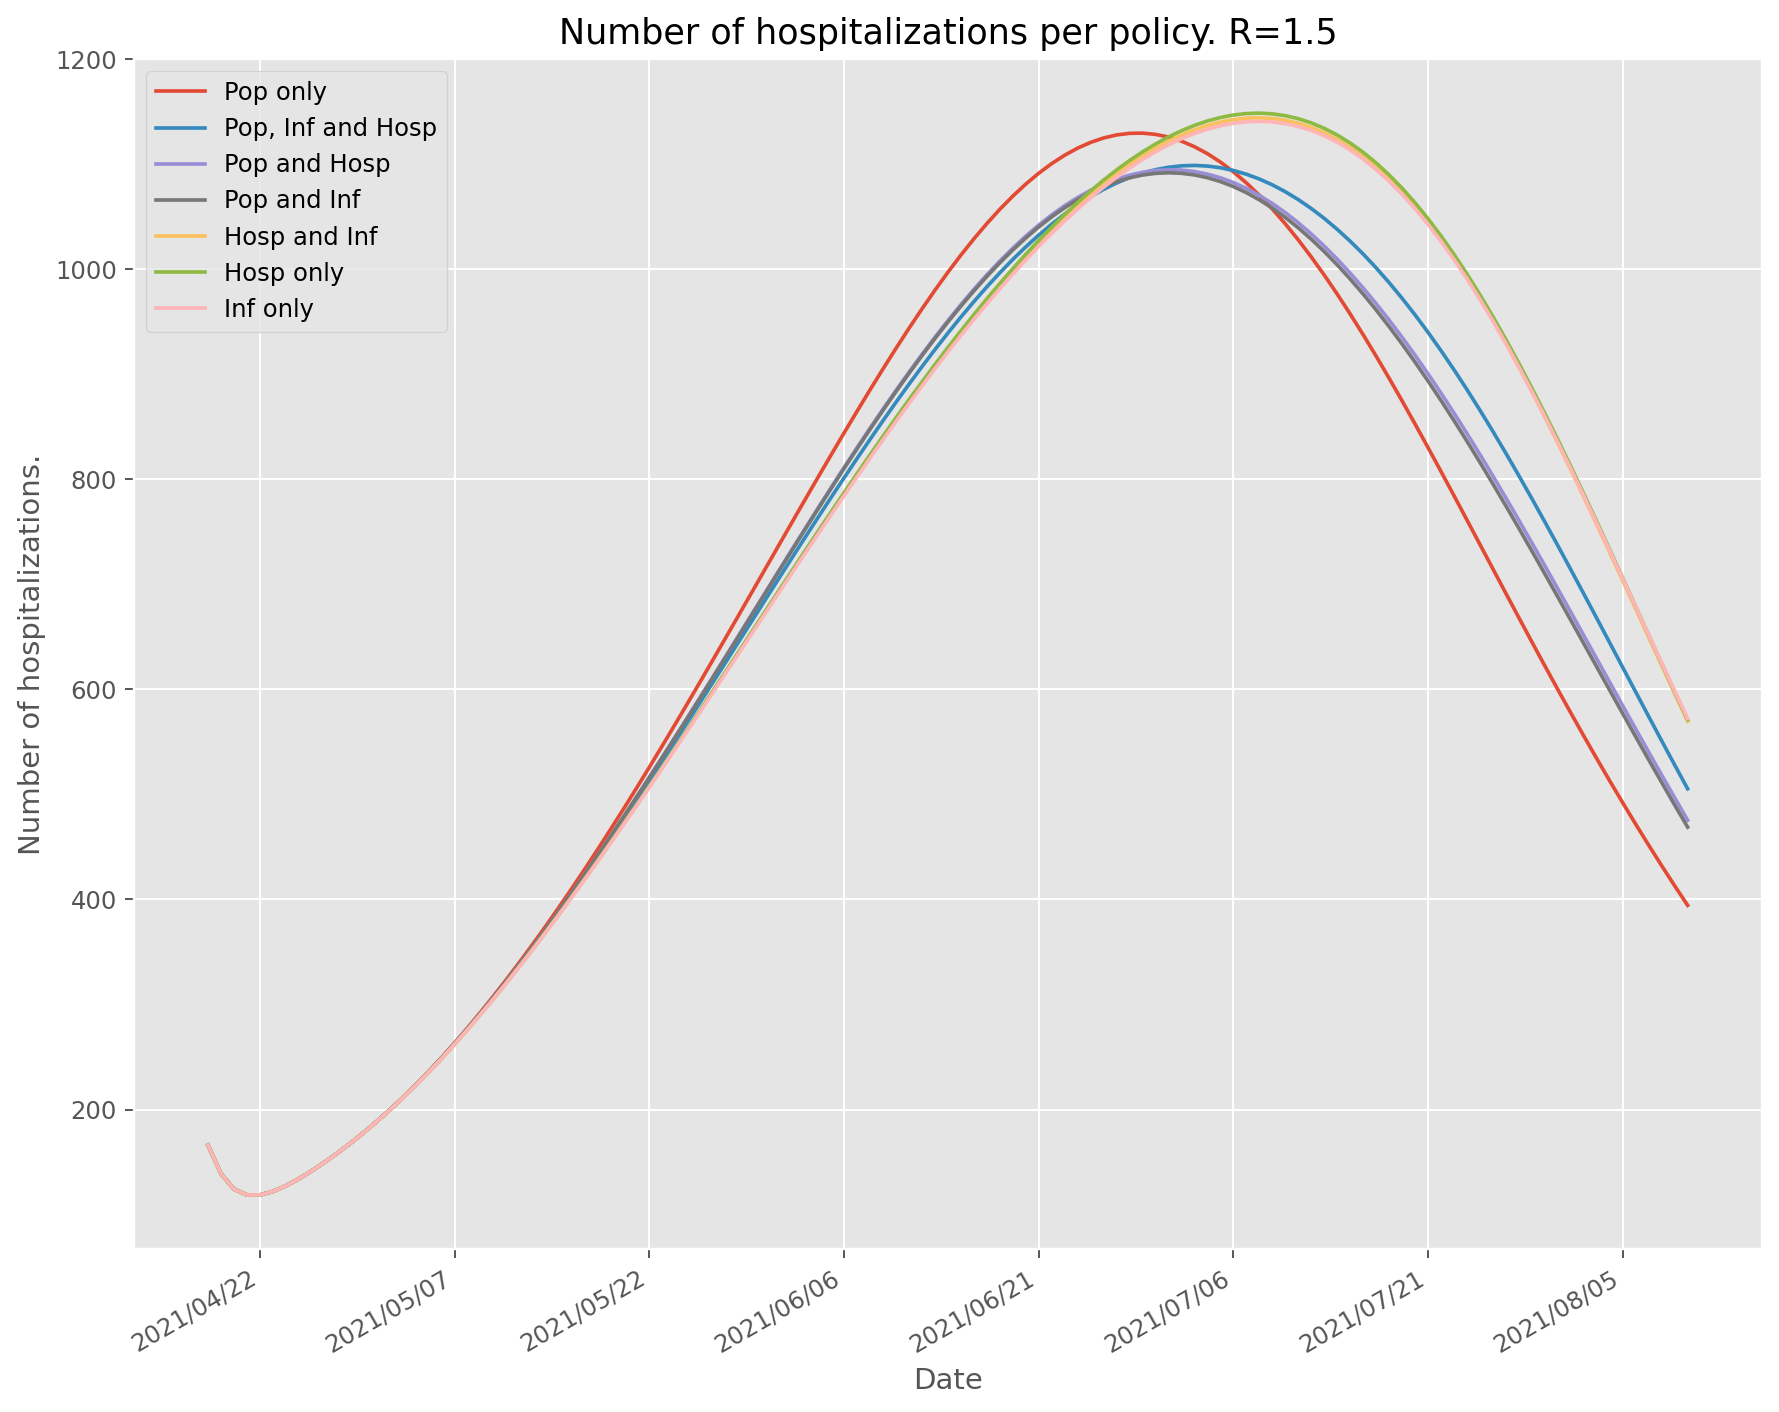

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 267049.39434553083
Pop and Inf: 272852.1287285412
Pop and Hosp: 273478.22138218733
Pop, Inf and Hosp: 276486.73240976146
Inf only: 284616.77293776773
Hosp and Inf: 284988.04488417896
Hosp only: 285568.36642834236


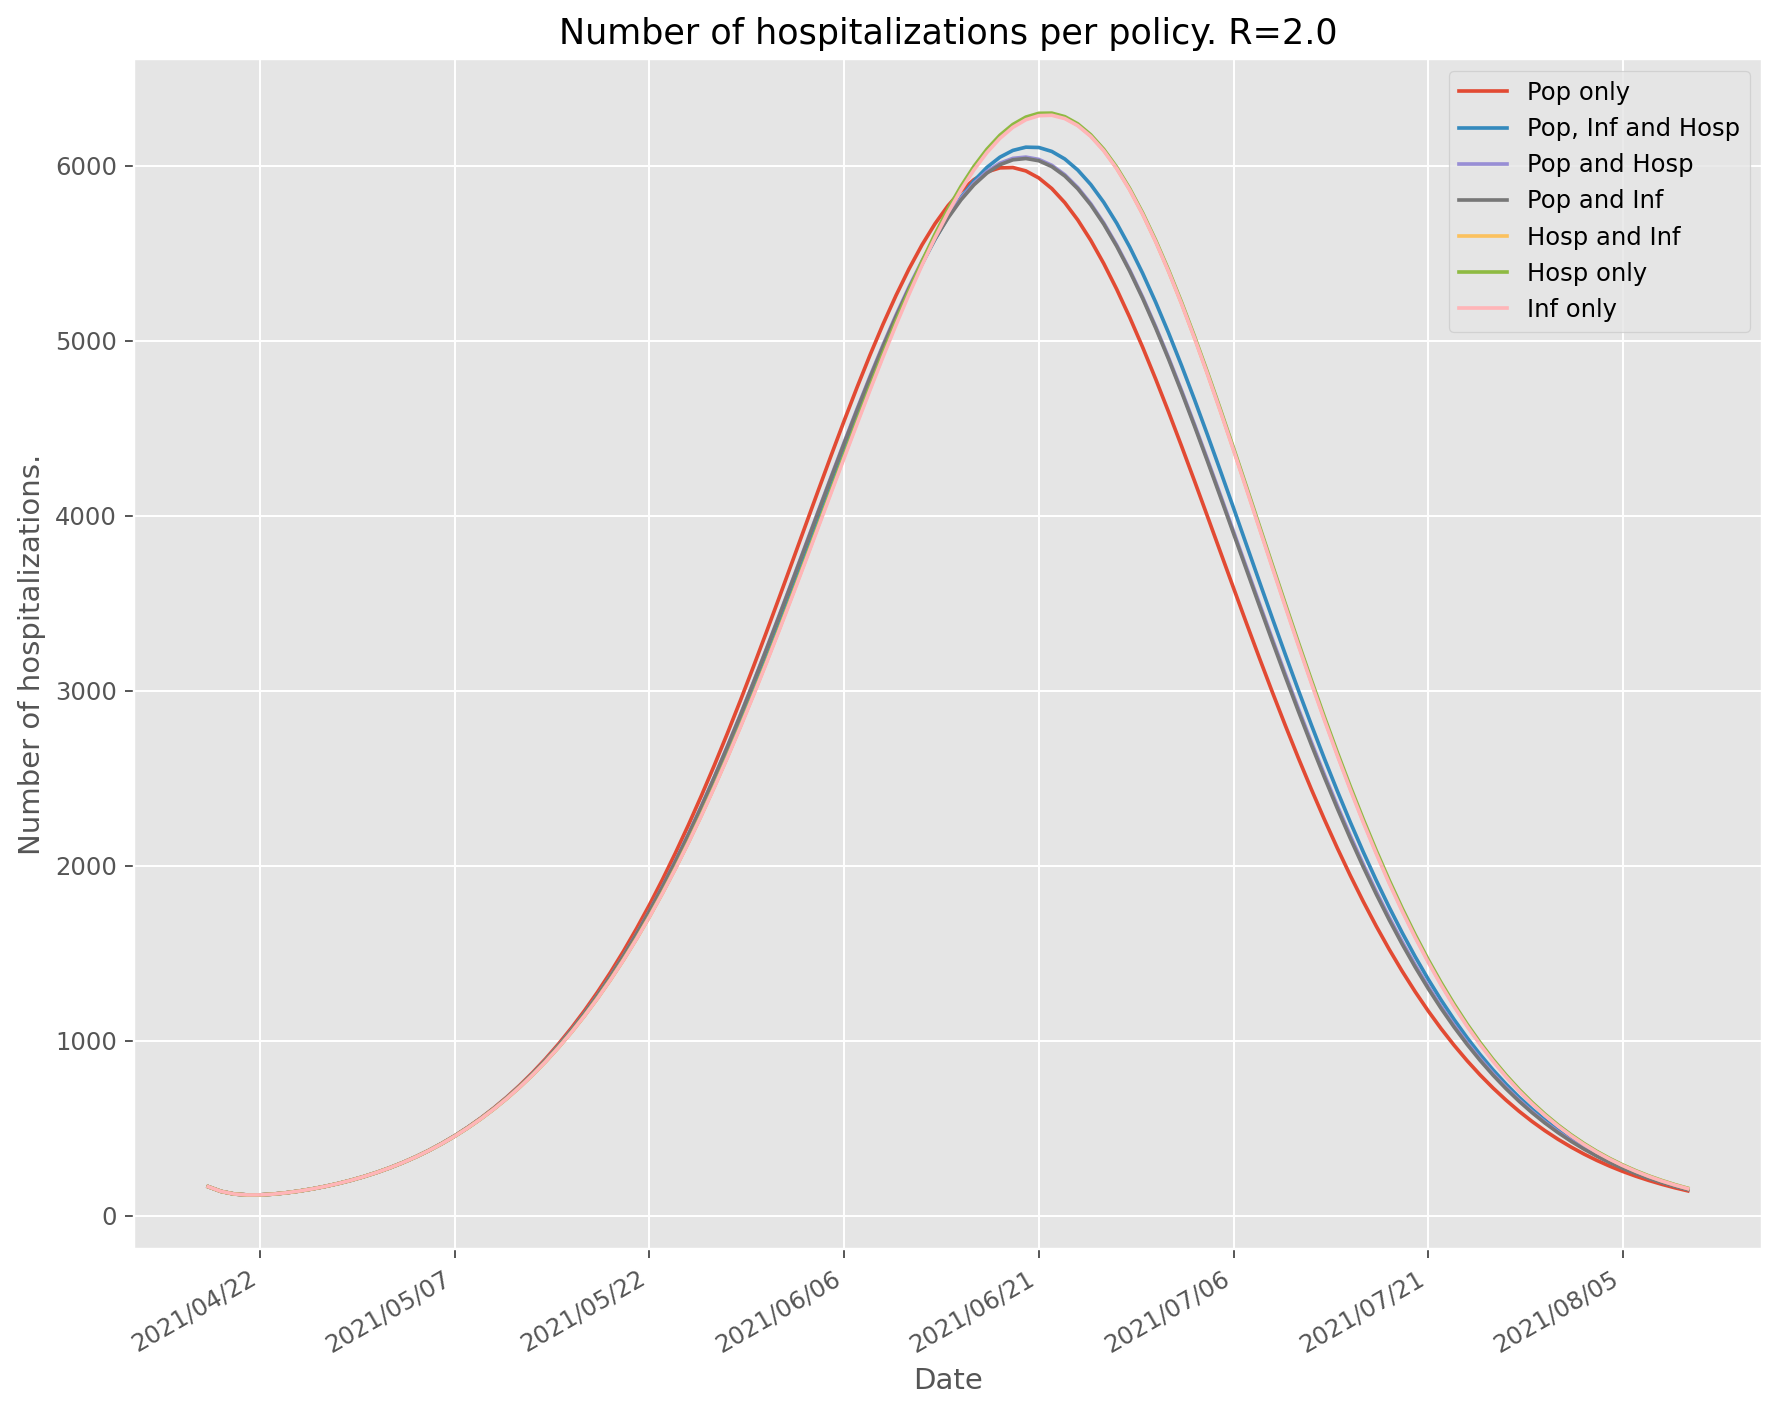

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# New Hospitalizations

Inf only: 1389.9021440959746
Hosp and Inf: 1391.6425014179254
Hosp only: 1393.7708204863368
Pop, Inf and Hosp: 1397.3864151846917
Pop and Inf: 1402.2832846684435
Pop and Hosp: 1403.8752027353585
Pop only: 1435.5510597979753


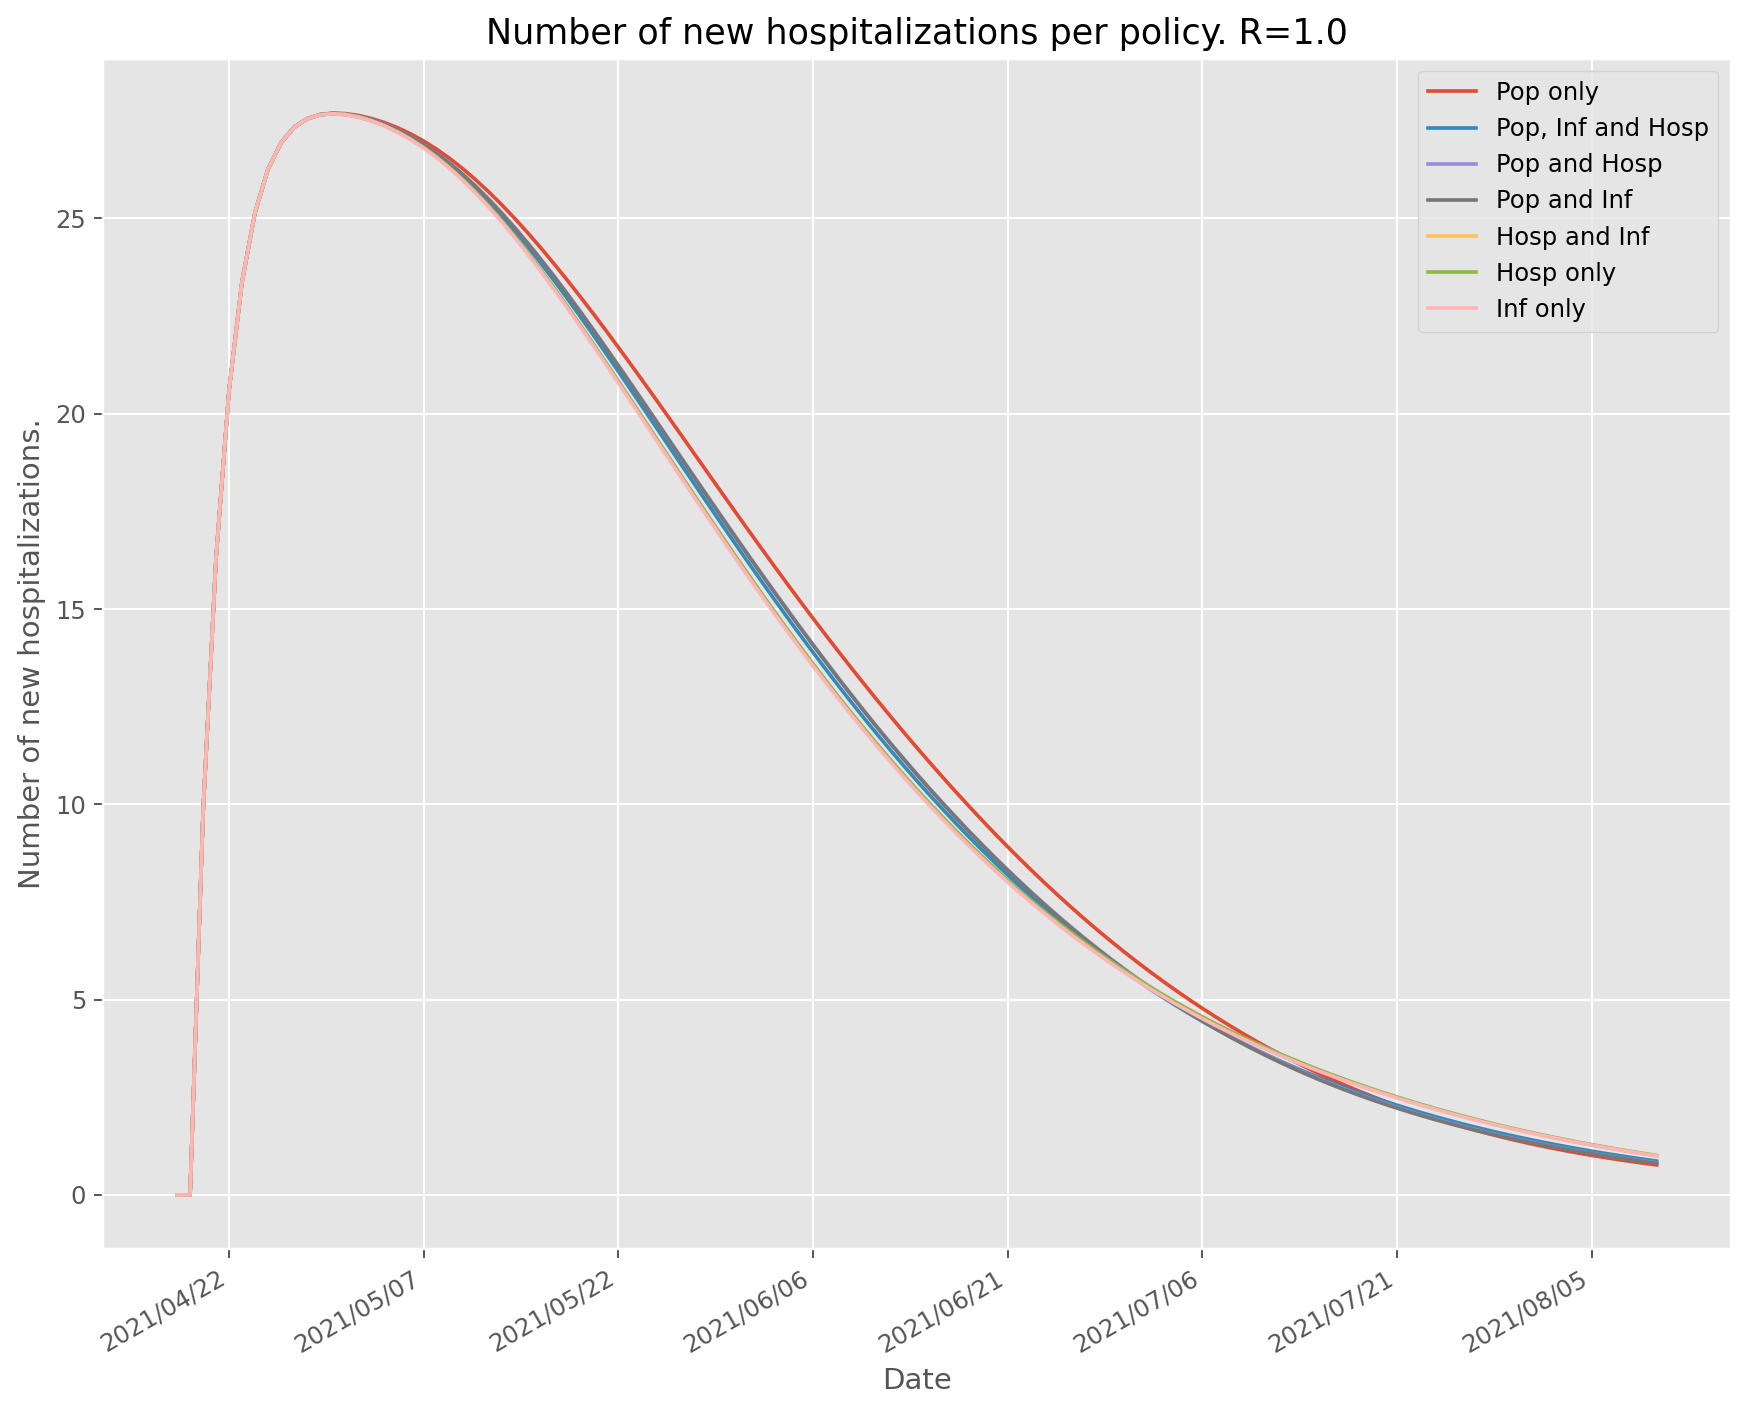

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 4493.118481126015
Pop and Hosp: 4506.510786883206
Pop, Inf and Hosp: 4513.847434786469
Inf only: 4577.330694493356
Hosp and Inf: 4586.195293127328
Pop only: 4598.1802267015
Hosp only: 4599.848041301204


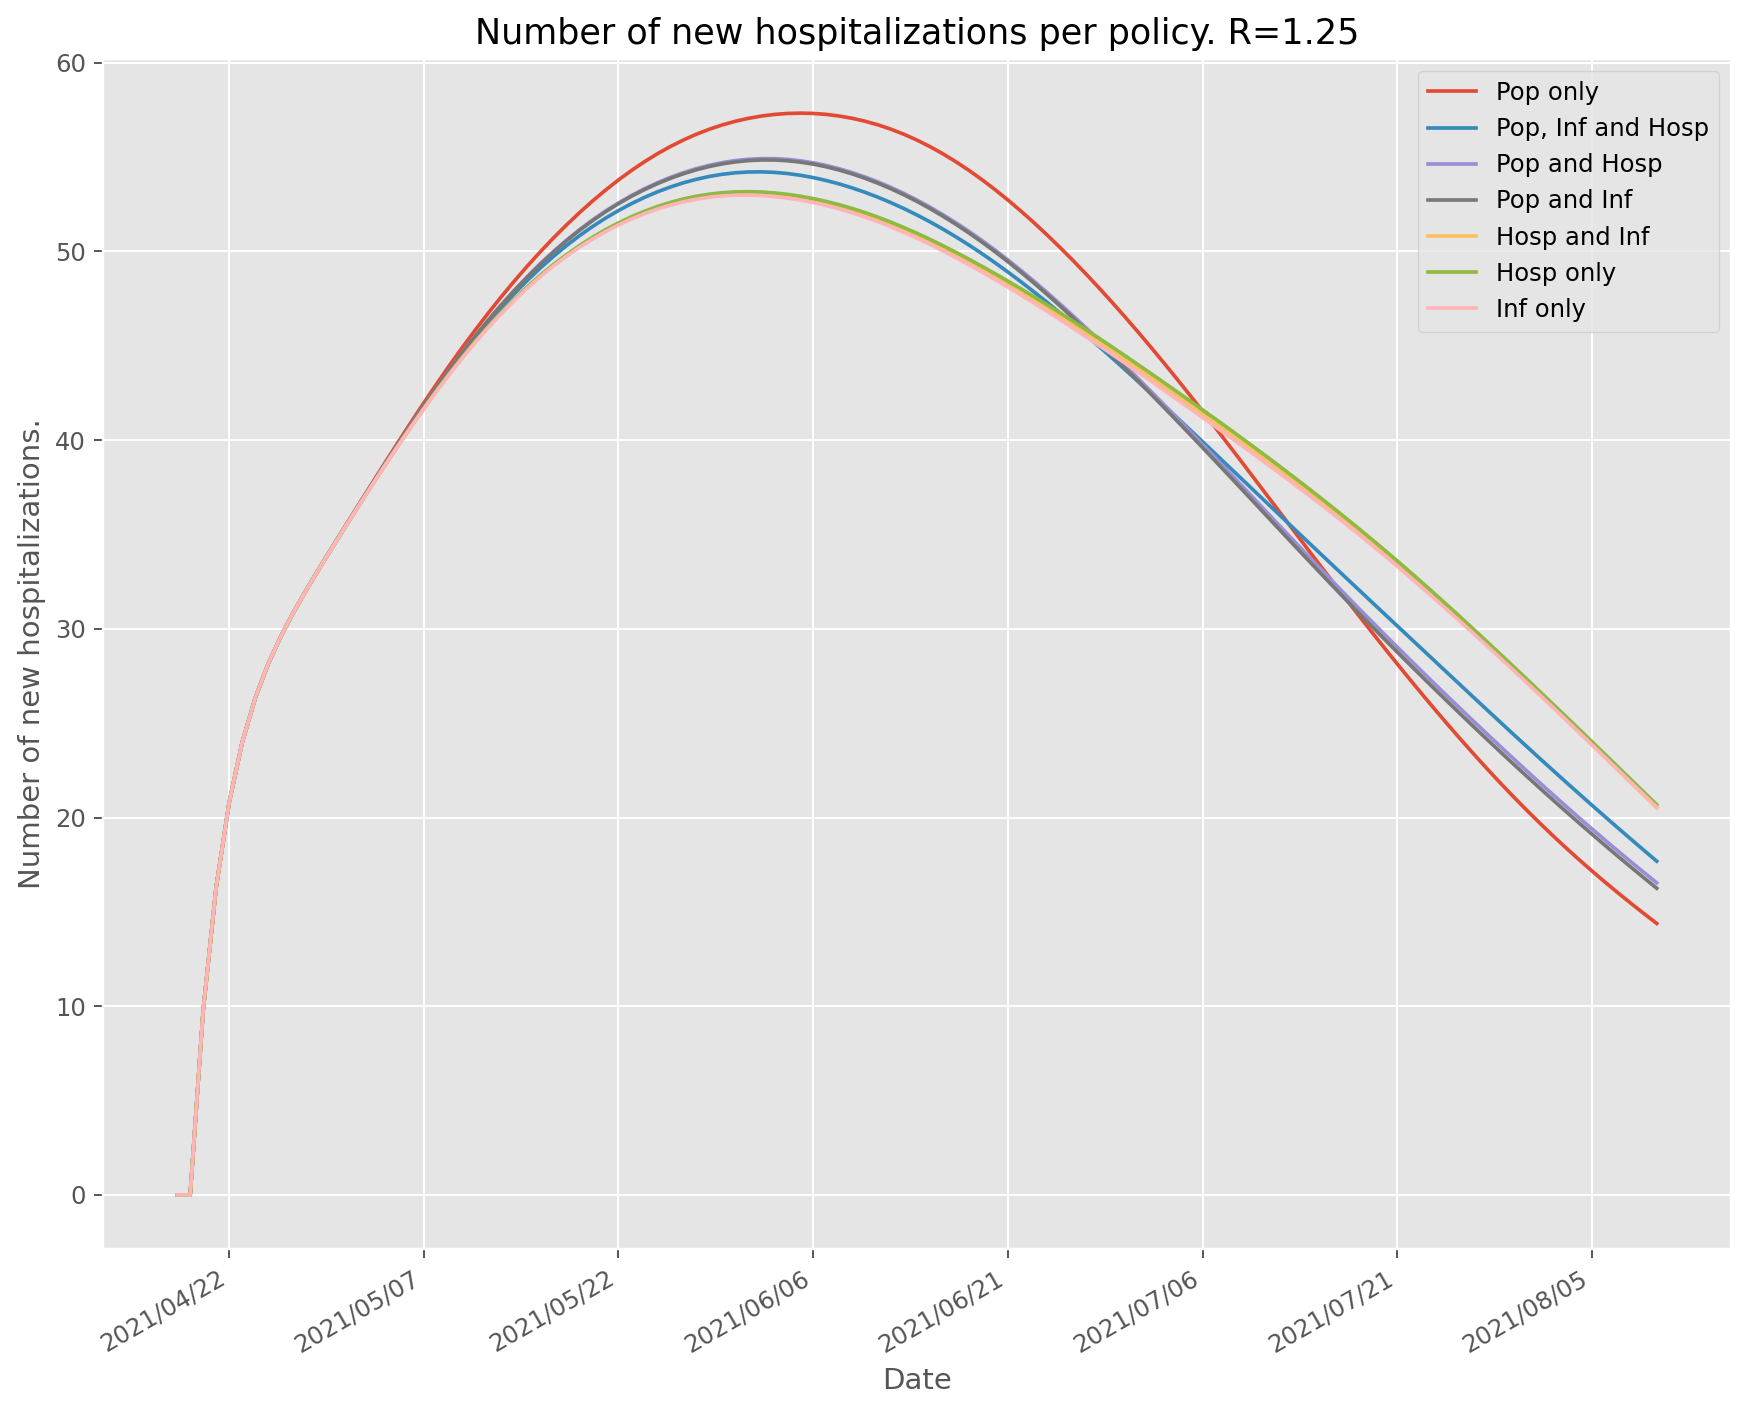

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 15419.581540575247
Pop and Inf: 15556.892906349743
Pop and Hosp: 15622.257996677969
Pop, Inf and Hosp: 15822.06523278007
Inf only: 16421.58179473611
Hosp and Inf: 16443.18920420241
Hosp only: 16491.829556504115


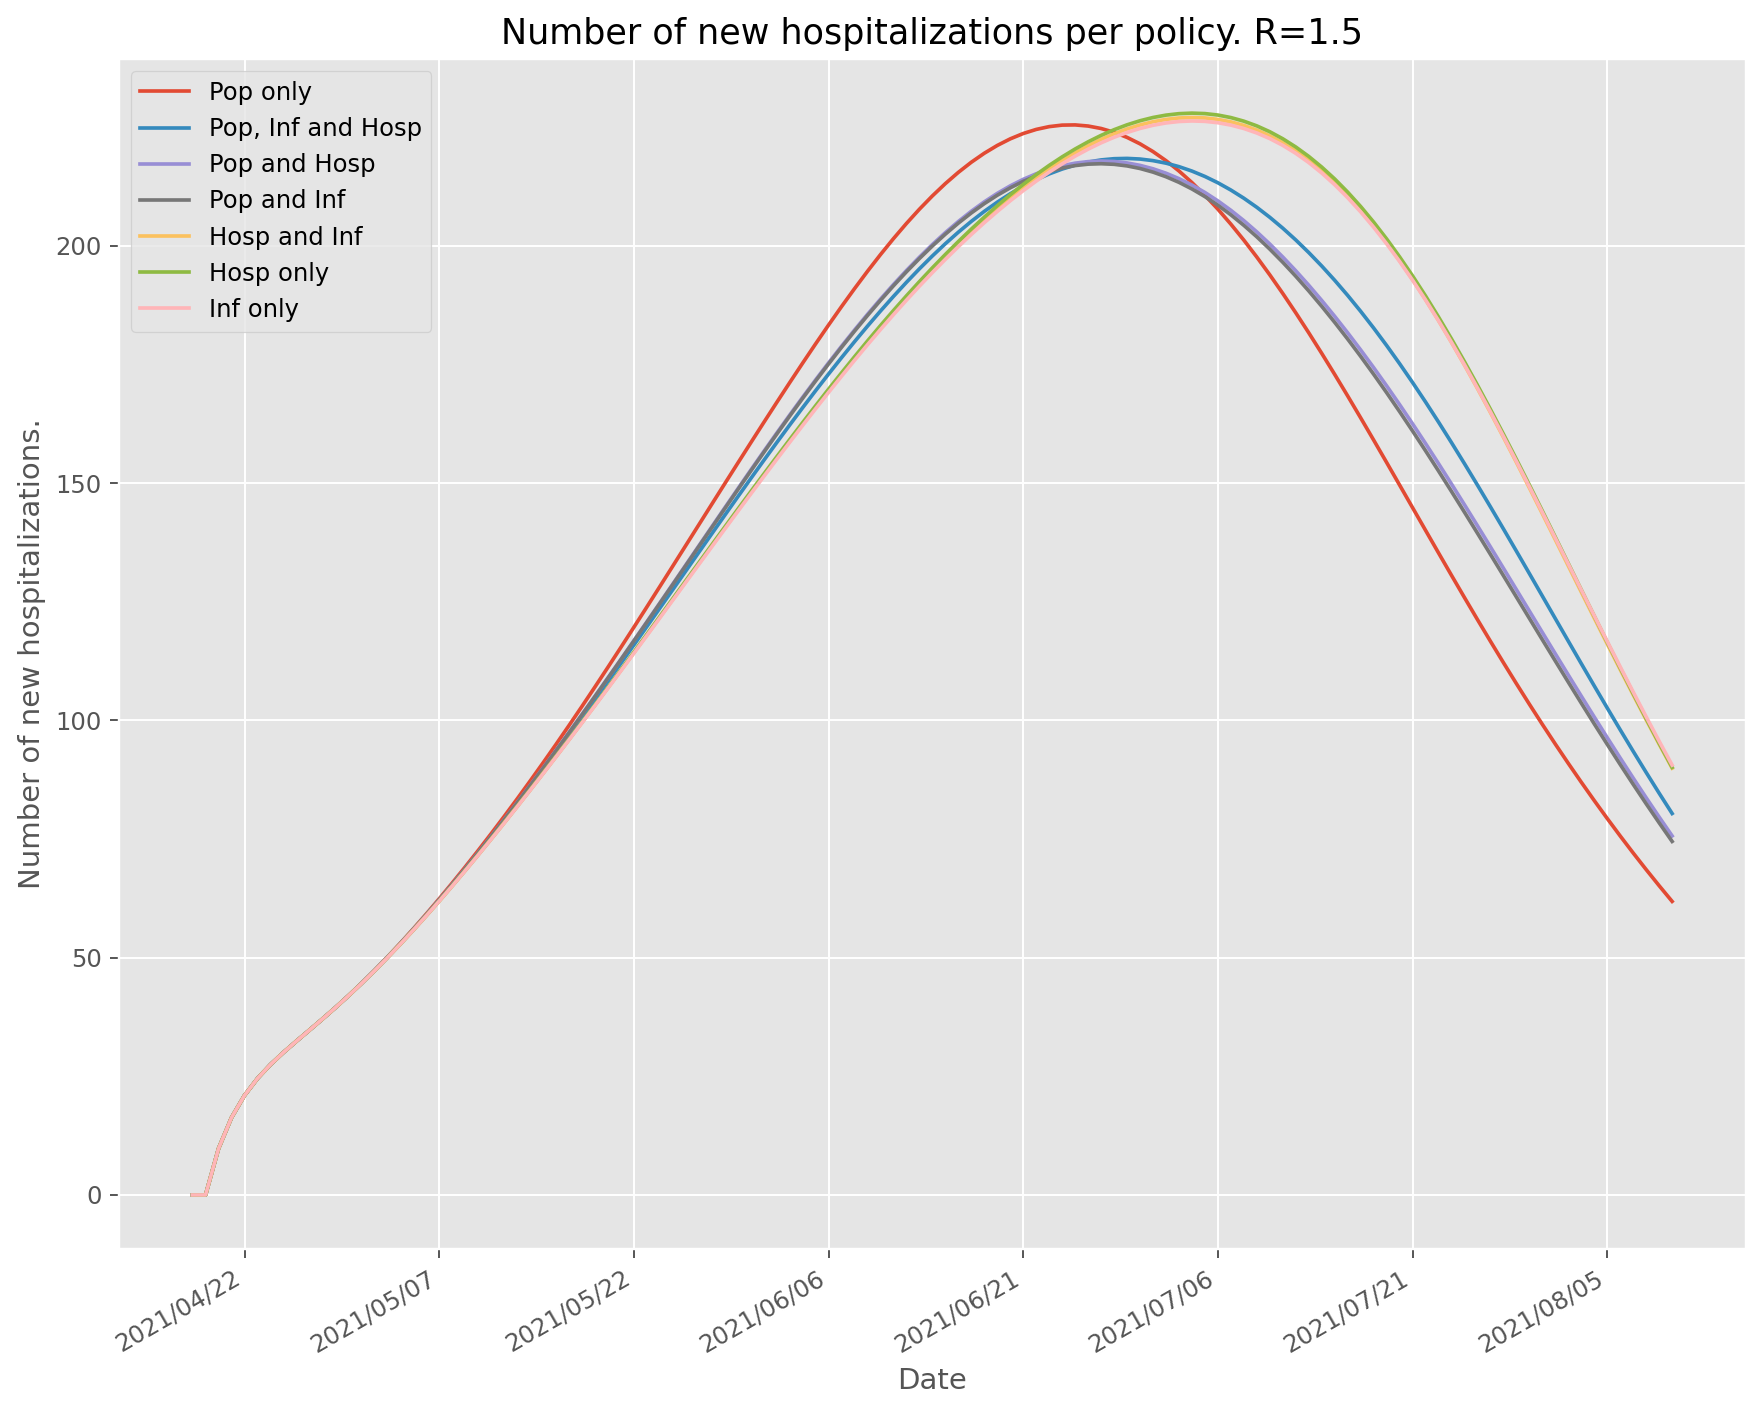

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 52369.78273899605
Pop and Inf: 53498.24935879439
Pop and Hosp: 53623.72832152925
Pop, Inf and Hosp: 54203.547602764076
Inf only: 55754.85980376759
Hosp and Inf: 55833.25330621423
Hosp only: 55951.84070510948


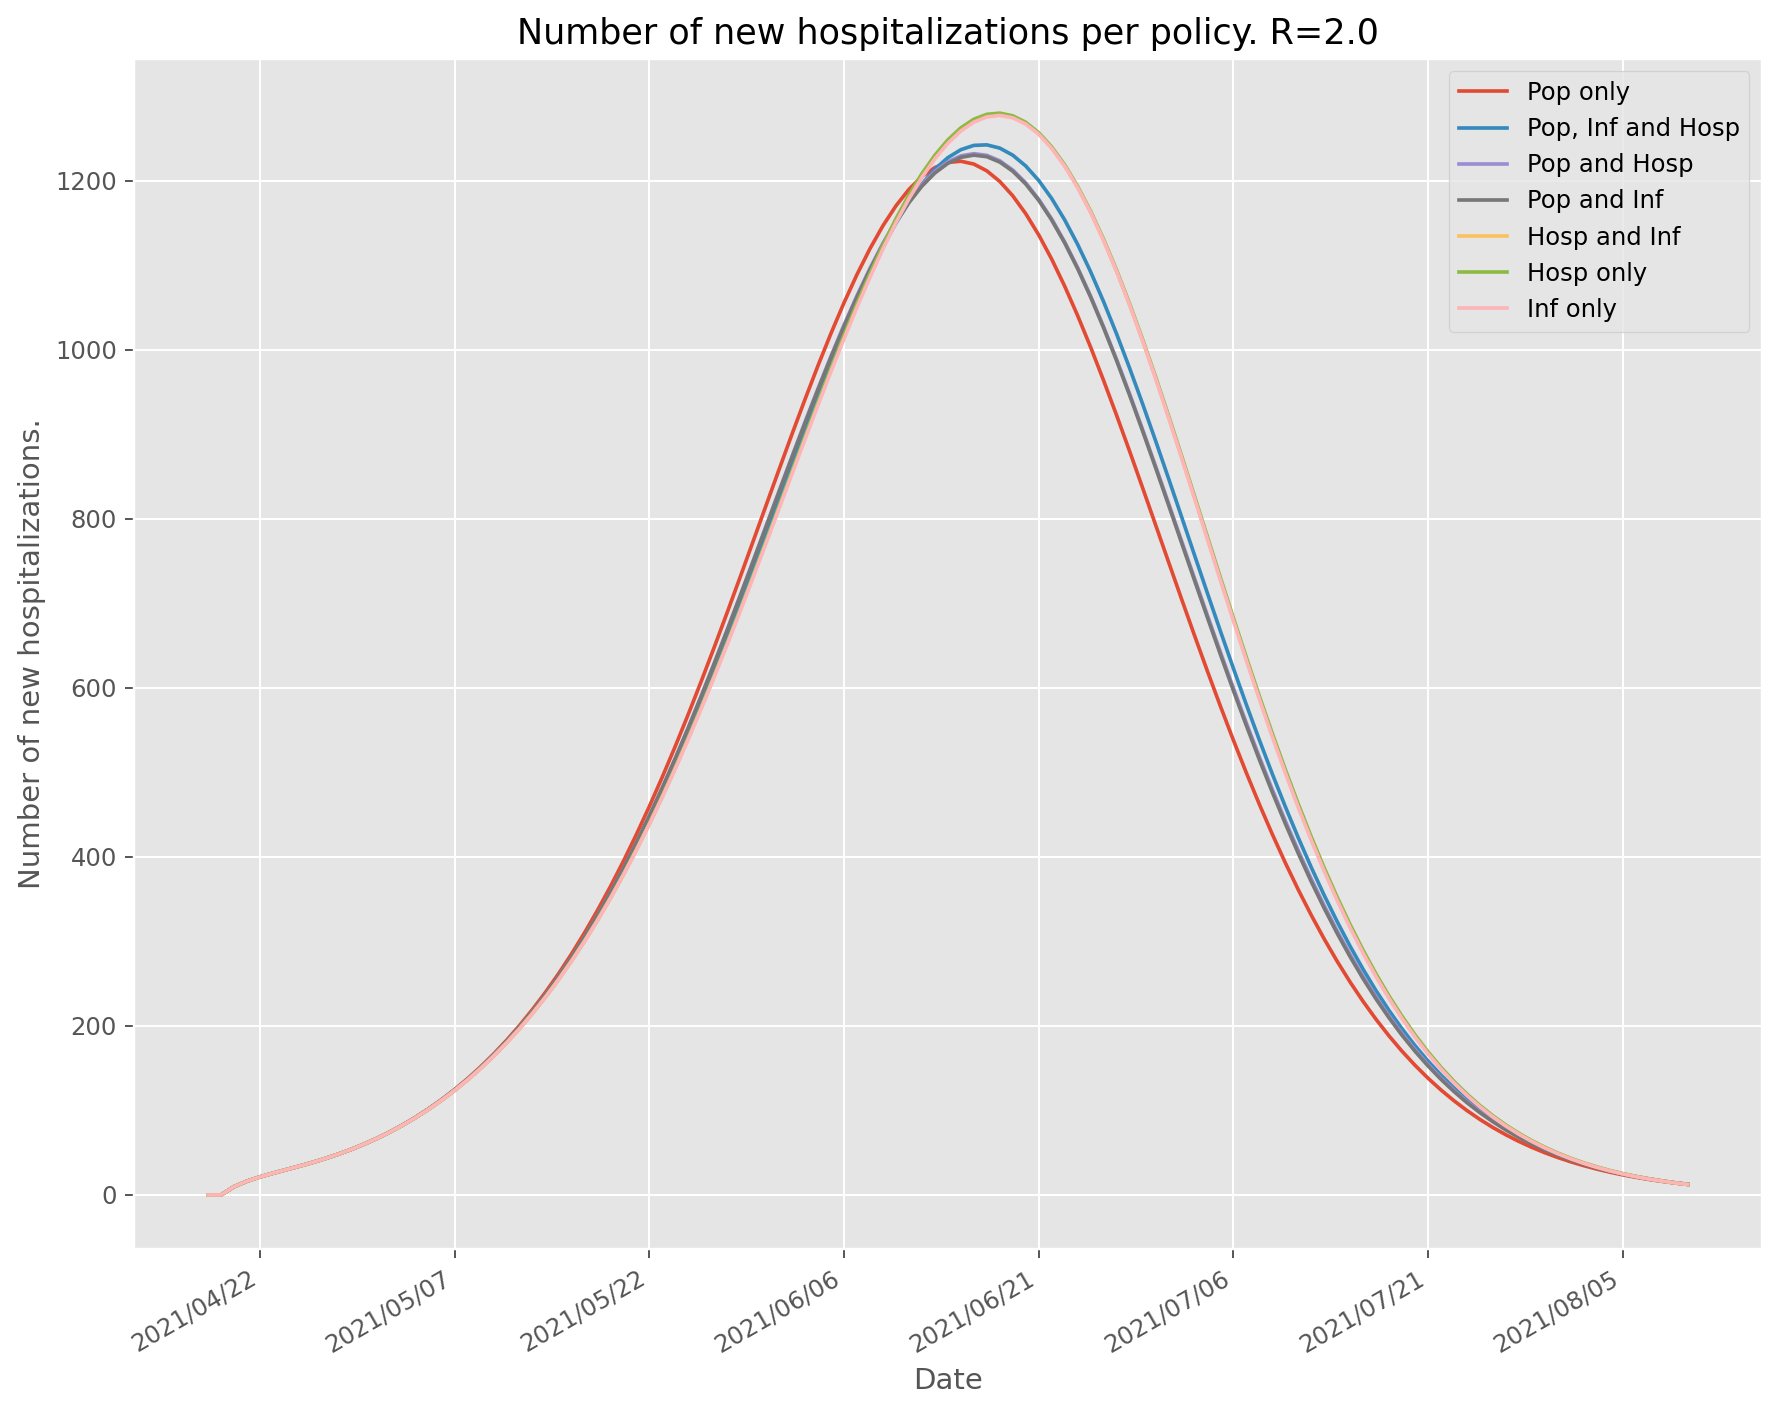

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Infections

Inf only: 202679.0239964636
Hosp and Inf: 202874.81532130798
Hosp only: 203062.82901580536
Pop, Inf and Hosp: 205161.12102867986
Pop and Inf: 206348.05078896545
Pop and Hosp: 206460.3556250141
Pop only: 211167.64828607417


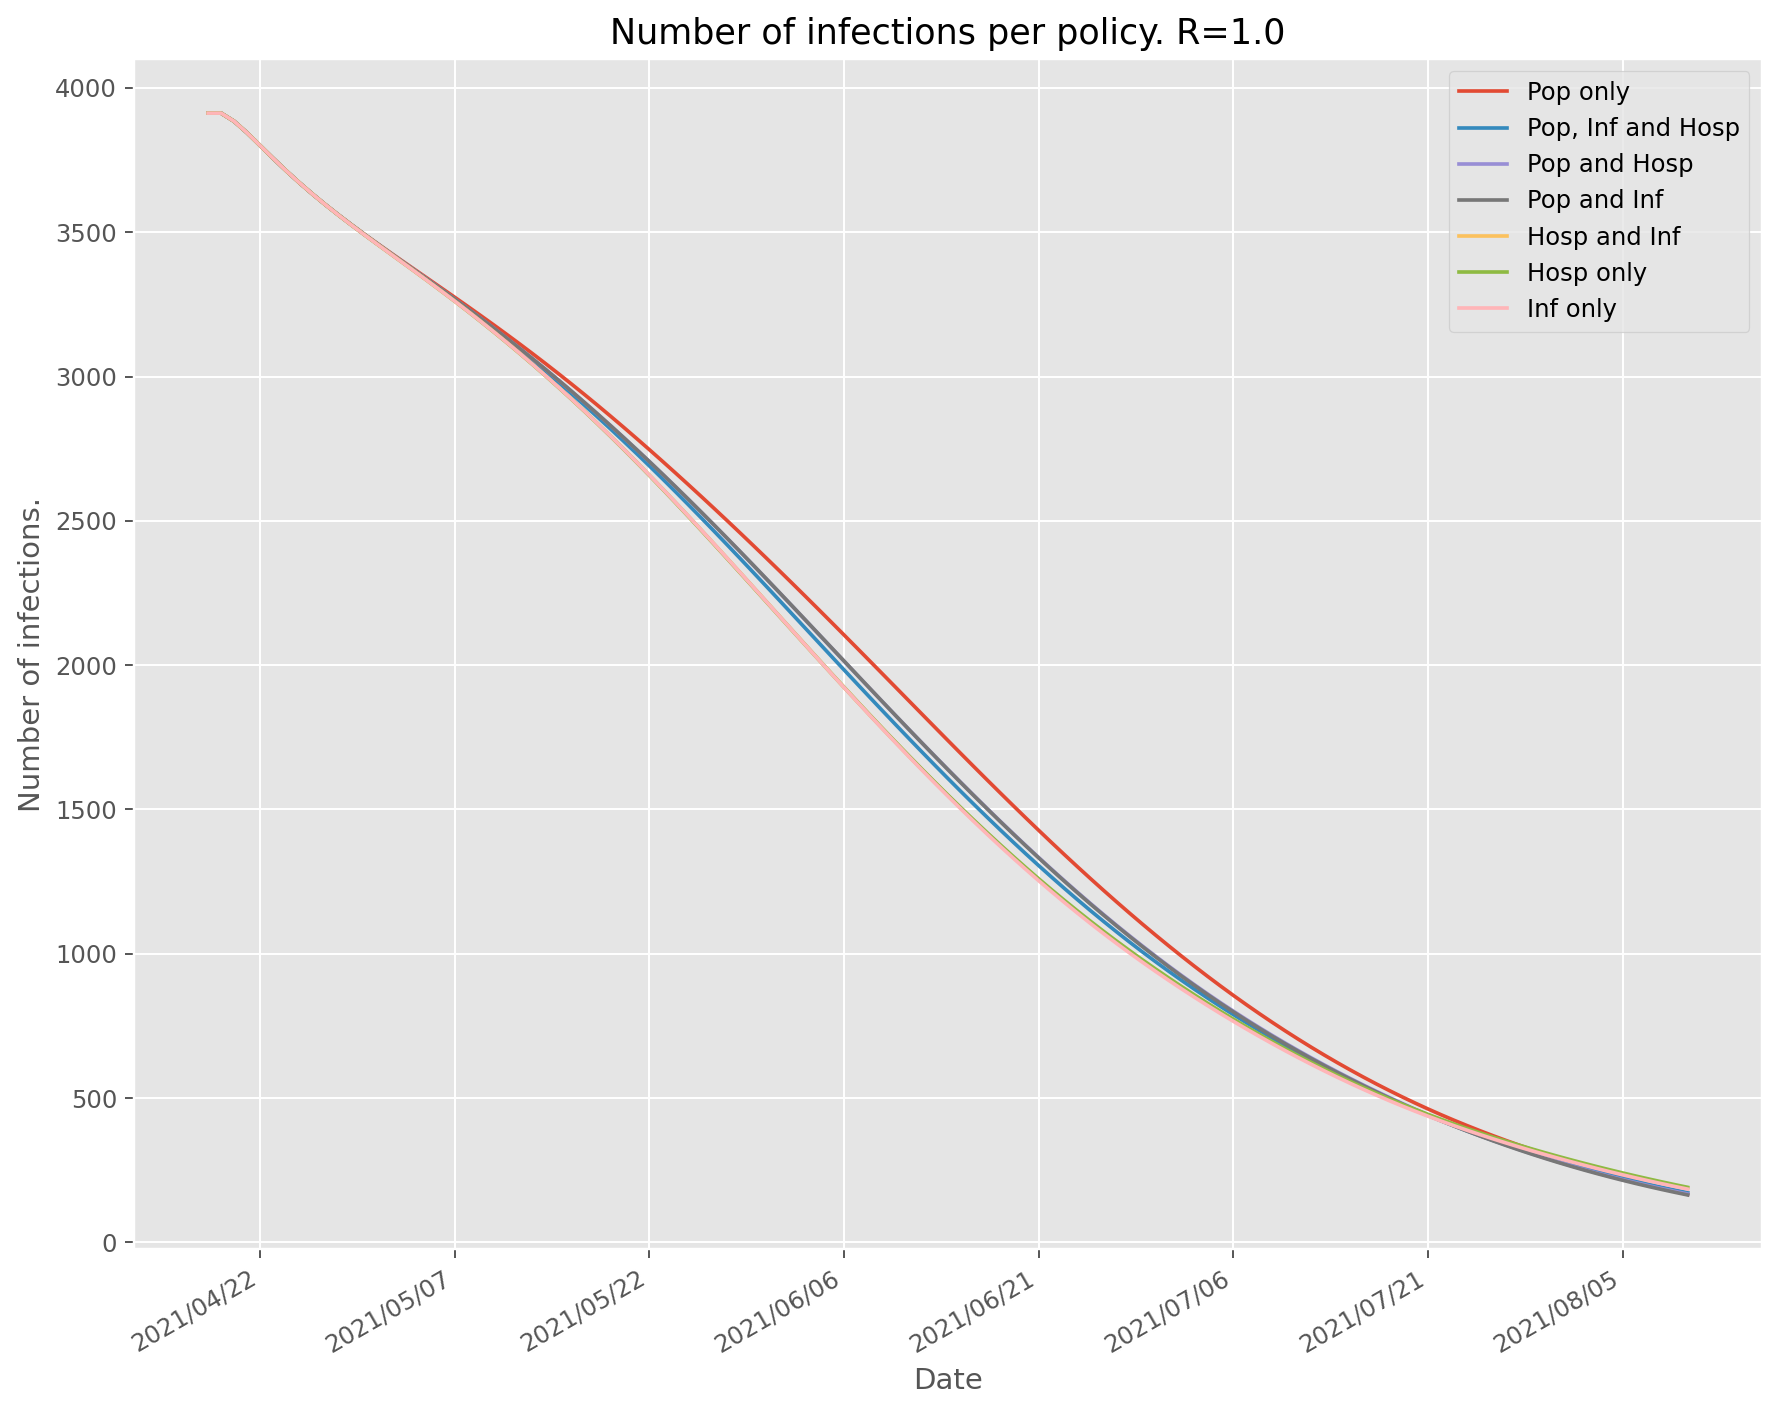

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 770949.9947244399
Hosp and Inf: 773203.138958901
Hosp only: 775582.8387236284
Pop, Inf and Hosp: 776846.9148973372
Pop and Inf: 778450.8735358436
Pop and Hosp: 780262.6446100633
Pop only: 799387.0150026724


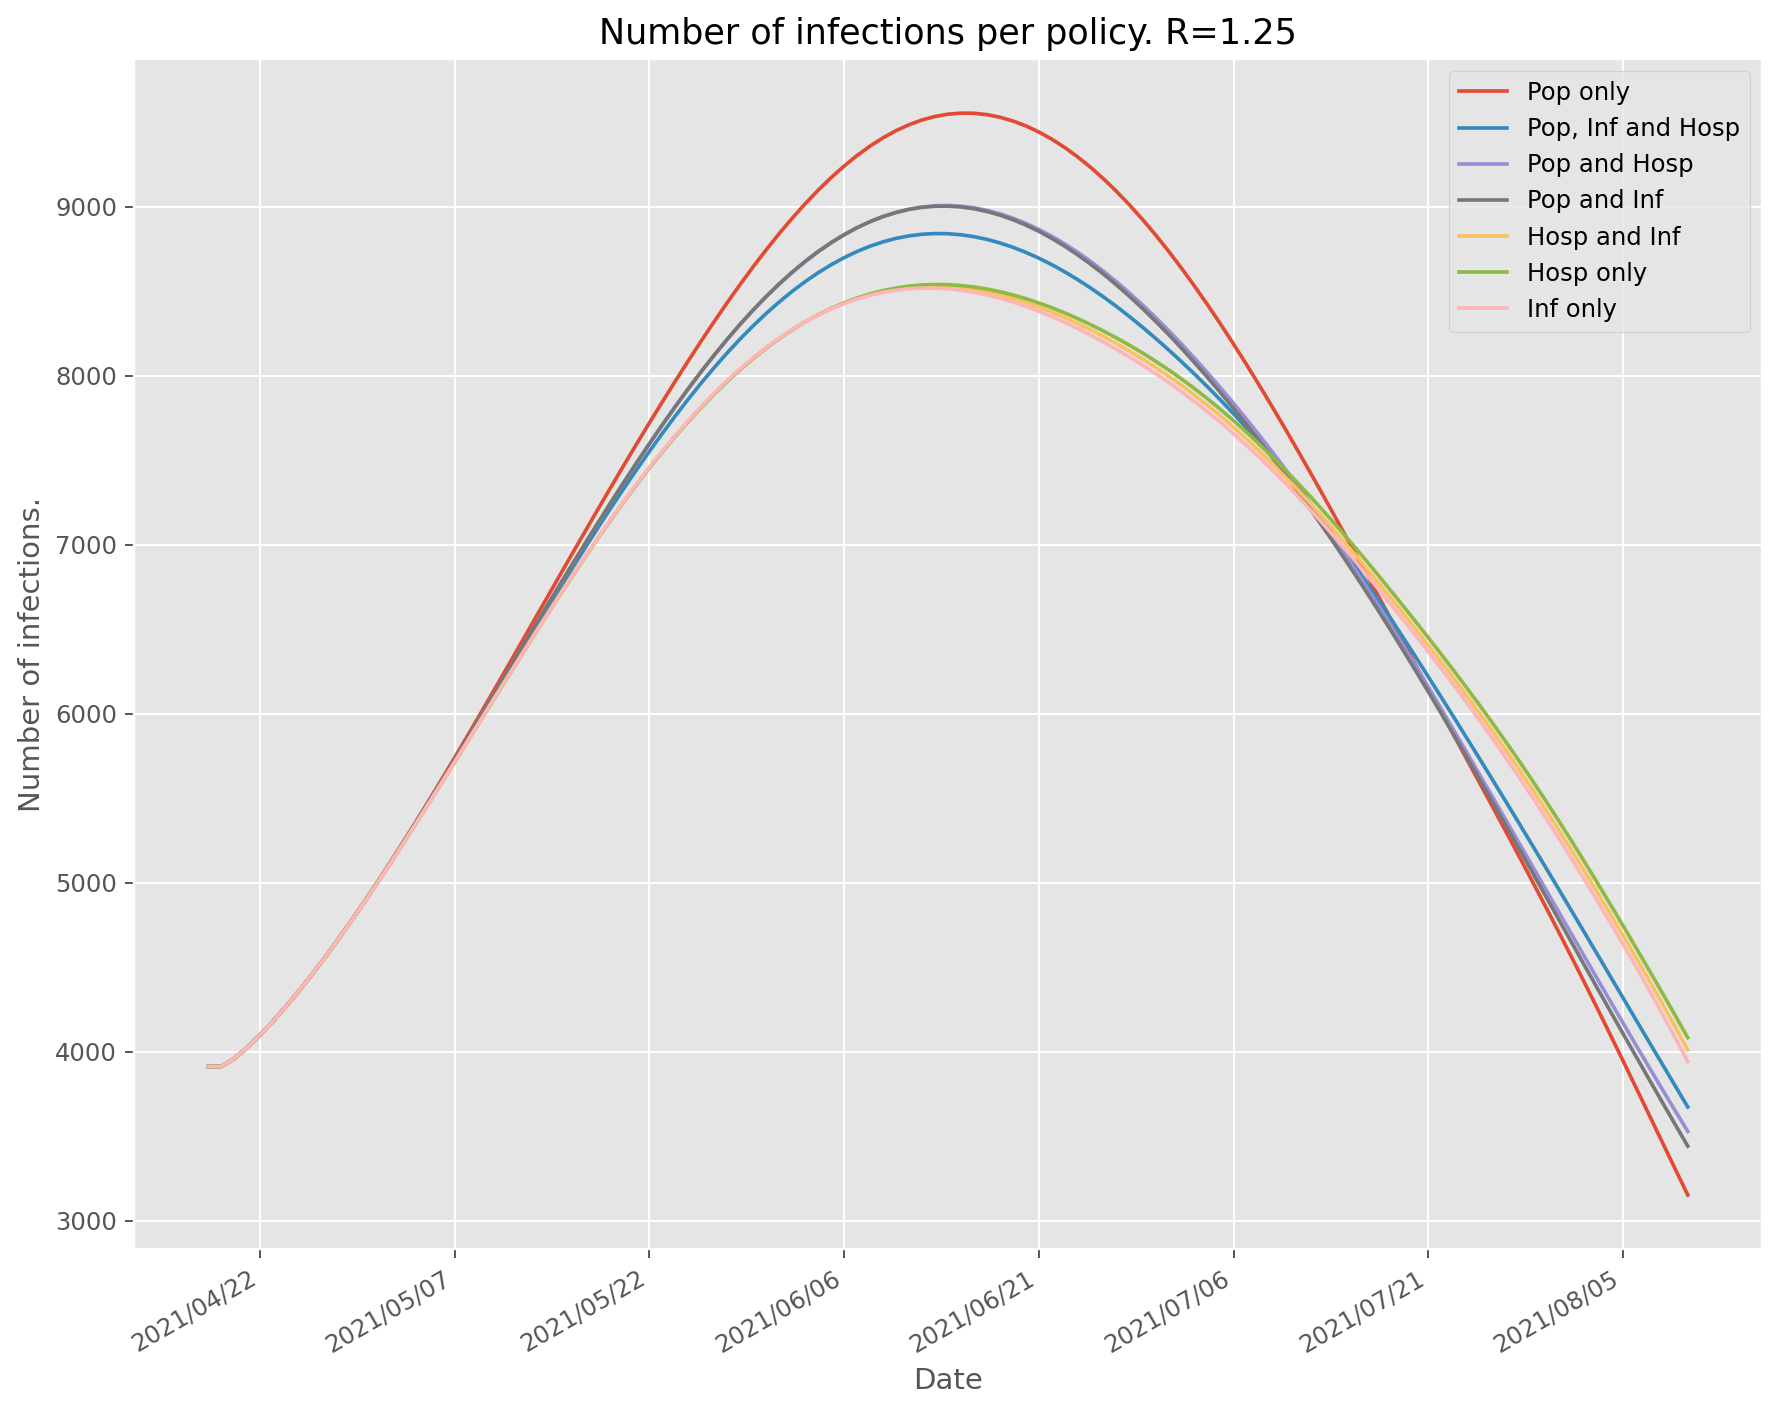

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 2761146.9221577826
Pop only: 2764635.2155139213
Pop and Hosp: 2769631.955549712
Pop, Inf and Hosp: 2774656.2953386023
Inf only: 2781844.164583314
Hosp and Inf: 2788949.9791795807
Hosp only: 2797084.6604132047


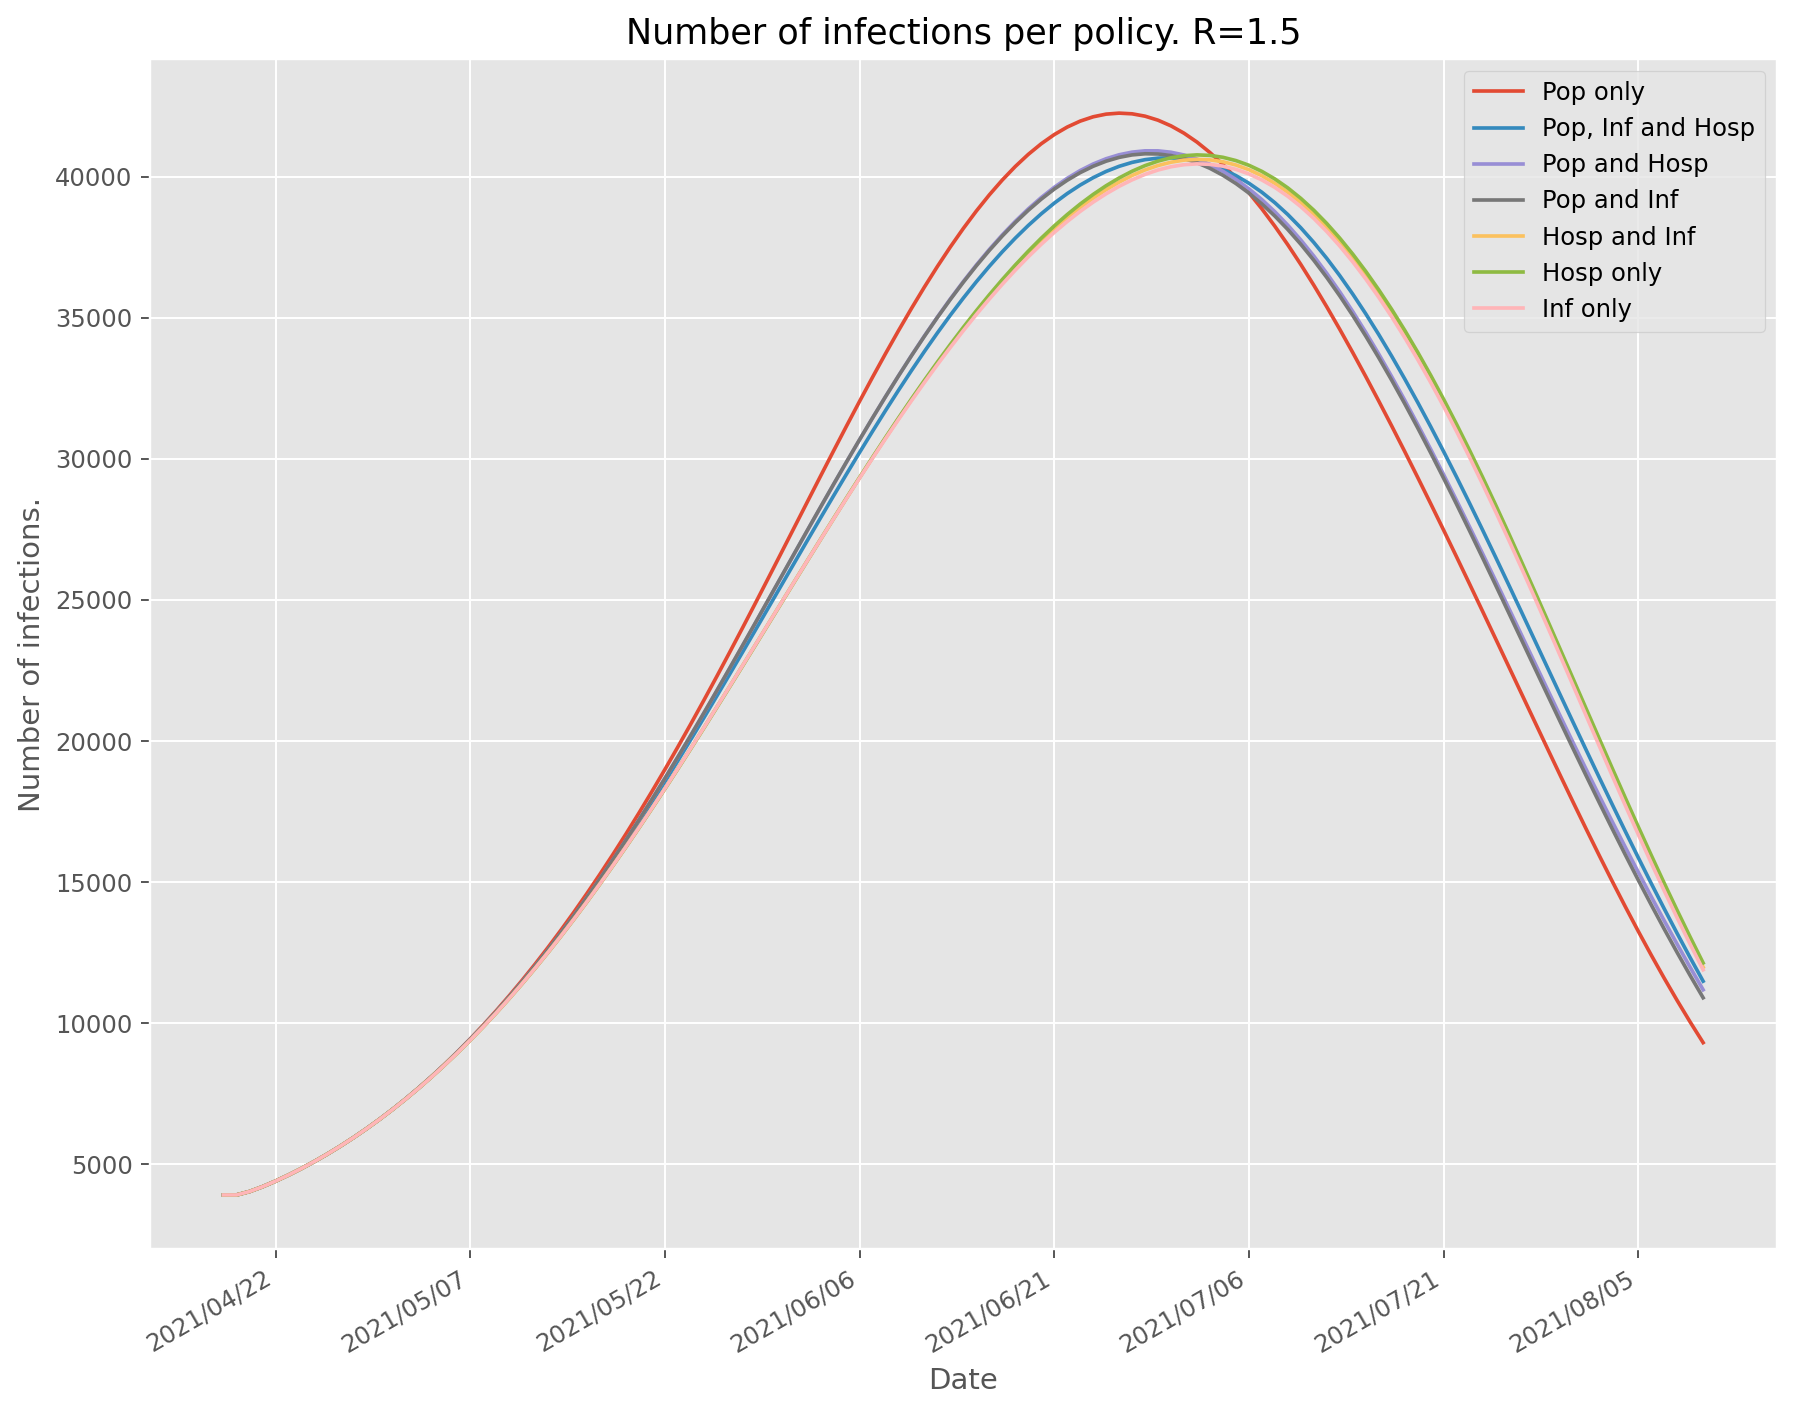

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 7663285.616375371
Pop and Inf: 7692439.355830504
Inf only: 7692937.108765845
Pop and Hosp: 7701225.274168182
Hosp and Inf: 7701566.672268353
Pop, Inf and Hosp: 7702635.909098386
Hosp only: 7709873.380880835


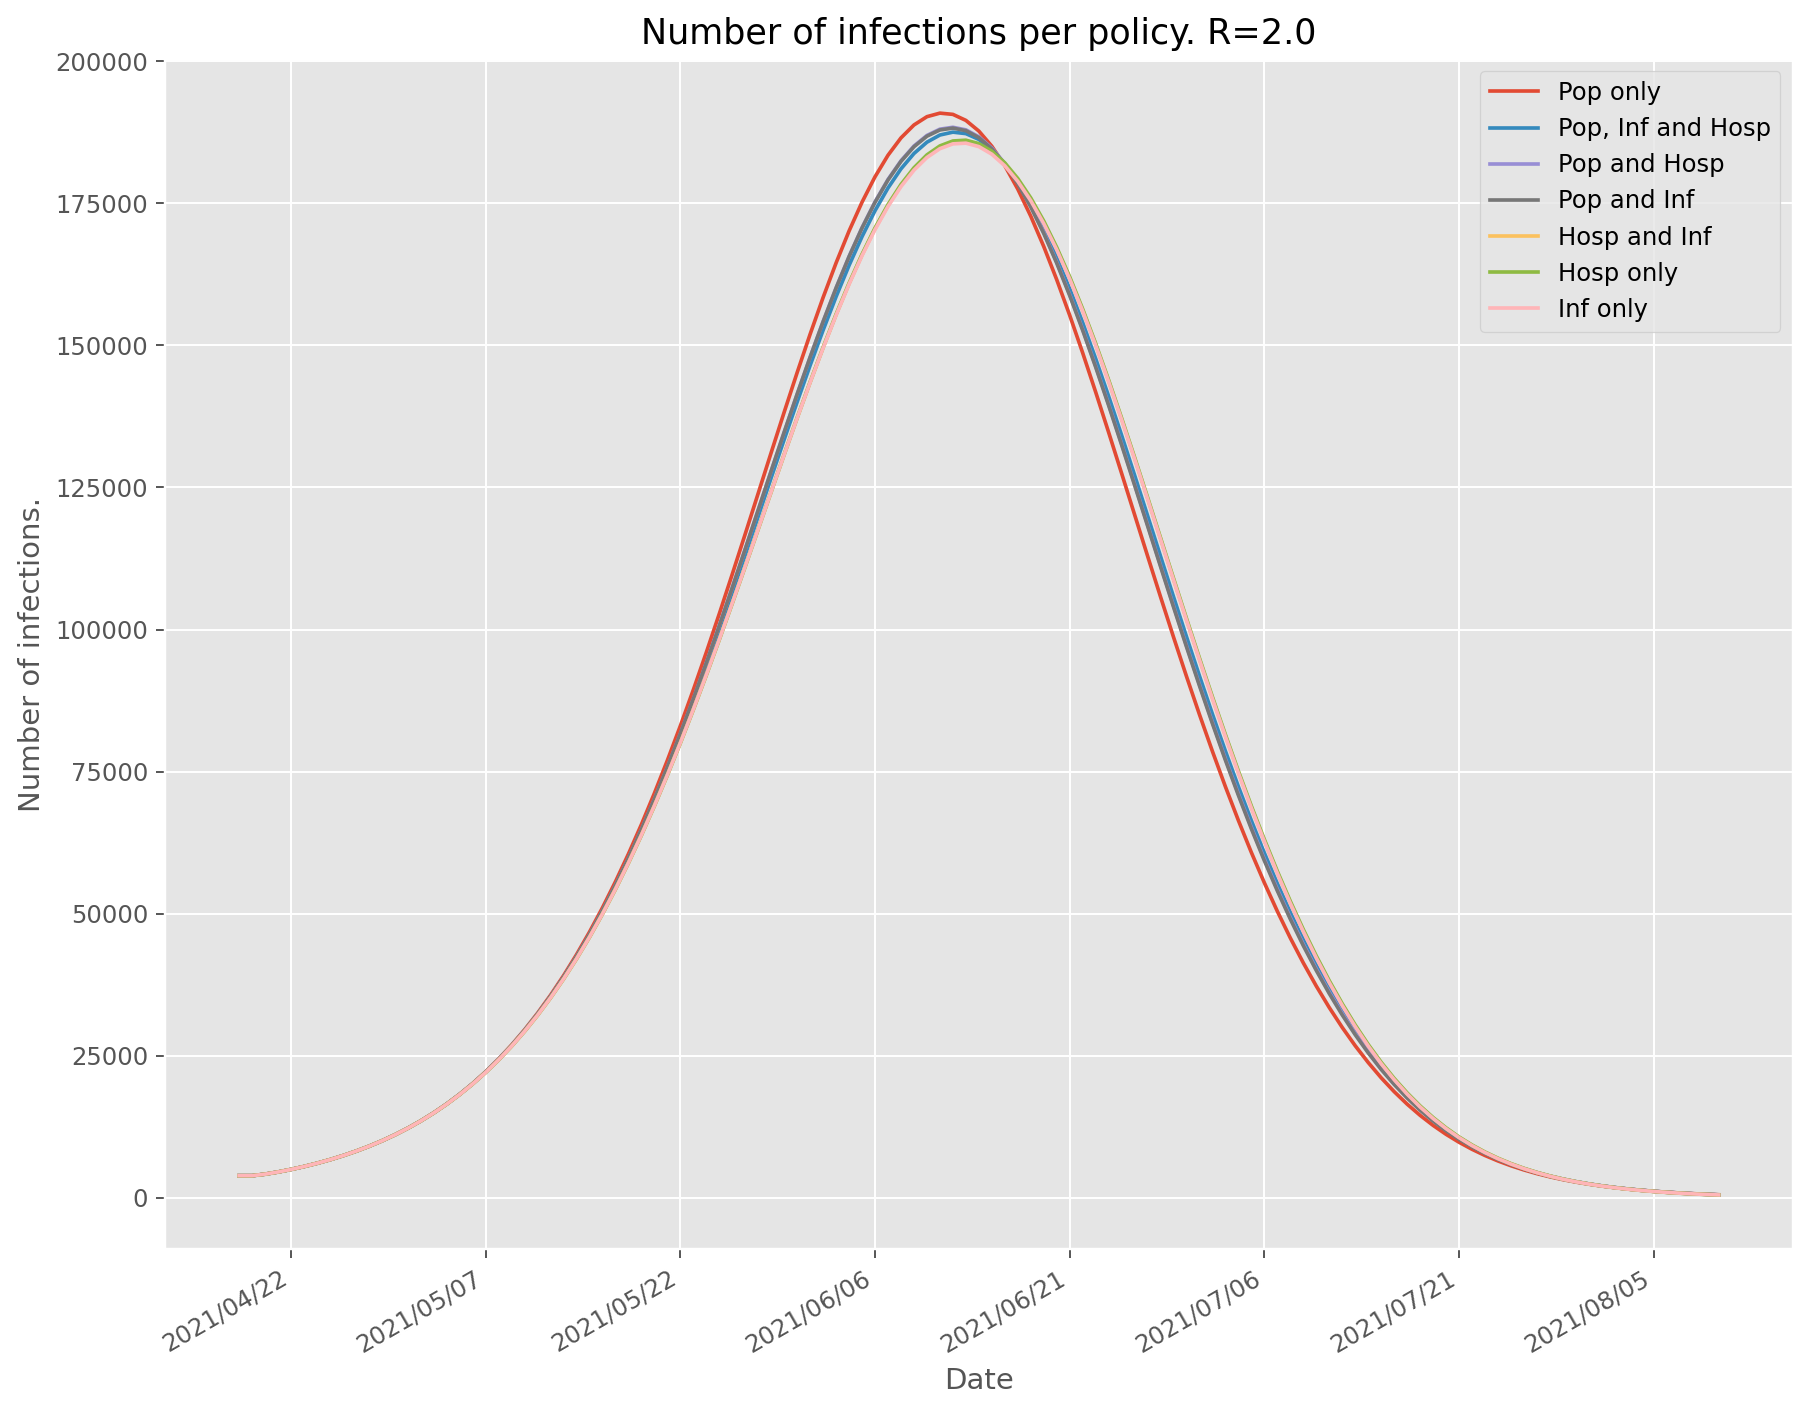

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()